In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import acos, atan2, sqrt, degrees, radians

# Define the Forward Kinematics Function
> Task 1 - Forward Kinematics



In [ ]:
def forward_kinematics(theta1, theta2, theta3, L1, L2, L3):
    """
    Calculate the (x, y) position of the end effector using forward kinematics.

    Parameters:
    theta1, theta2, theta3 : Joint angles in radians
    L1, L2, L3 : Lengths of the links

    Returns:
    (x, y) : Position of the end effector in 2D space
    """
    # Convert angles from degrees to radians
    theta1 = radians(theta1)
    theta2 = radians(theta2)
    theta3 = radians(theta3)

    # Calculate the position of each joint
    x1 = L1 * np.cos(theta1)
    y1 = L1 * np.sin(theta1)
    x2 = x1 + L2 * np.cos(theta1 + theta2)
    y2 = y1 + L2 * np.sin(theta1 + theta2)
    x3 = x2 + L3 * np.cos(theta1 + theta2 + theta3)
    y3 = y2 + L3 * np.sin(theta1 + theta2 + theta3)

    return (x3, y3)

# Define the Inverse Kinematics Function


>   Task 2 - Inverse Kinematics



In [ ]:
def inverse_kinematics(x, y, L1, L2, L3):
    """
    Calculate the joint angles (theta1, theta2, theta3) using inverse kinematics.

    Parameters:
    x, y : Desired position of the end effector in 2D space
    L1, L2, L3 : Lengths of the links

    Returns:
    theta1, theta2, theta3 : Joint angles in radians
    """
    r = sqrt(x**2 + y**2)

    # Check if the target is reachable
    if r > L1 + L2 + L3 or r < abs(L1 - L2 - L3):
        raise ValueError("Target is not reachable")

    # Inverse kinematics calculations
    cos_theta3 = (r**2 - L1**2 - L2**2 - L3**2 + 2*L1*L2 + 2*L1*L3 + 2*L2*L3) / (2 * L2 * L3)

    # Ensure cos_theta3 is within the valid range [-1, 1]
    cos_theta3 = np.clip(cos_theta3, -1.0, 1.0)

    theta3 = acos(cos_theta3)

    phi2 = atan2(y, x)
    phi1 = acos(np.clip((L2**2 + r**2 - L3**2) / (2 * L2 * r), -1.0, 1.0))
    theta2 = phi2 - phi1

    theta1 = atan2(y, x) - theta2 - theta3

    # Convert angles from radians to degrees
    theta1 = degrees(theta1)
    theta2 = degrees(theta2)
    theta3 = degrees(theta3)

    return (theta1, theta2, theta3)


# Visualization Function


> Task 3 - Simulation and Visualization



In [ ]:
def plot_robot(theta1, theta2, theta3, L1, L2, L3):
    """
    Plot the robot arm configuration given the joint angles.

    Parameters:
    theta1, theta2, theta3 : Joint angles in radians
    L1, L2, L3 : Lengths of the links
    """
    # Convert angles from degrees to radians
    theta1 = np.radians(theta1)
    theta2 = np.radians(theta2)
    theta3 = np.radians(theta3)

    # Calculate joint positions
    x0, y0 = 0, 0  # Base of the robot
    x1, y1 = L1 * np.cos(theta1), L1 * np.sin(theta1)
    x2, y2 = x1 + L2 * np.cos(theta1 + theta2), y1 + L2 * np.sin(theta1 + theta2)
    x3, y3 = x2 + L3 * np.cos(theta1 + theta2 + theta3), y2 + L3 * np.sin(theta1 + theta2 + theta3)

    # Plot the robot arm with the preferred visual style
    plt.figure(figsize=(8, 8))
    plt.plot([x0, x1, x2, x3], [y0, y1, y2, y3], '-o', linewidth=3, markersize=10, markerfacecolor='red')
    plt.xlim(-sum([L1, L2, L3]), sum([L1, L2, L3]))
    plt.ylim(-sum([L1, L2, L3]), sum([L1, L2, L3]))
    plt.xlabel('X', fontsize=14)
    plt.ylabel('Y', fontsize=14)
    plt.title('3-Link Robot Arm', fontsize=16)
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')  # Keep the aspect ratio equal
    plt.show()

# Testing the Forward and Inverse Kinematics

In [ ]:
# Example usage for Tasks 1 to 4:
L1, L2, L3 = 5, 5, 5  # link lengths
theta1, theta2, theta3 = 30, 45, 60  # joint angles in degrees

In [ ]:
# Task 1: Forward Kinematics
x, y = forward_kinematics(theta1, theta2, theta3, L1, L2, L3)
print(f"End effector position: x = {x:.2f}, y = {y:.2f}\n")


End effector position: x = 2.09, y = 10.87



In [ ]:
# Task 2: Inverse Kinematics
theta1_calc, theta2_calc, theta3_calc = inverse_kinematics(x, y, L1, L2, L3)
print(f"Joint angles: ({theta1_calc:.2f}, {theta2_calc:.2f}, {theta3_calc:.2f})\n")

Joint angles: (0.00, 79.12, 0.00)



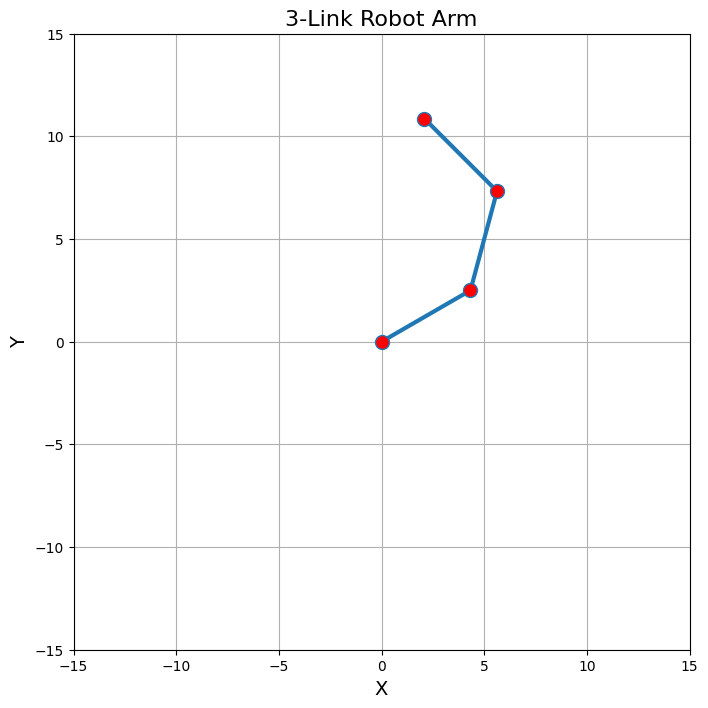

In [ ]:
# Task 3: Simulation and Visualization
plot_robot(theta1, theta2, theta3, L1, L2, L3)

# Path Planning Challenge


> Task 4 - Path Planning Challenge



In [ ]:
def path_planning(start, target, L1, L2, L3):
    """
    Implement a simple path planning algorithm to move the end effector from a starting
    position to a target position while avoiding obstacles.

    Parameters:
    x_start, y_start : Starting position of the end effector
    x_target, y_target : Target position of the end effector
    L1, L2, L3 : Lengths of the links
    """
    # Example of a simple straight-line path
    num_points = 100
    x_values = np.linspace(start[0], target[0], num_points)
    y_values = np.linspace(start[1], target[1], num_points)

    for x, y in zip(x_values, y_values):
        try:
            theta1, theta2, theta3 = inverse_kinematics(x, y, L1, L2, L3)
            plot_robot(theta1, theta2, theta3, L1, L2, L3)
        except ValueError as e:
            print(f"Skipping point ({x}, {y}): {e}")

Skipping point (0.0, 0.0): Target is not reachable
Skipping point (0.04697986577181208, 0.04697986577181208): Target is not reachable
Skipping point (0.09395973154362416, 0.09395973154362416): Target is not reachable
Skipping point (0.14093959731543626, 0.14093959731543626): Target is not reachable
Skipping point (0.18791946308724833, 0.18791946308724833): Target is not reachable
Skipping point (0.2348993288590604, 0.2348993288590604): Target is not reachable
Skipping point (0.2818791946308725, 0.2818791946308725): Target is not reachable
Skipping point (0.3288590604026846, 0.3288590604026846): Target is not reachable
Skipping point (0.37583892617449666, 0.37583892617449666): Target is not reachable
Skipping point (0.4228187919463087, 0.4228187919463087): Target is not reachable
Skipping point (0.4697986577181208, 0.4697986577181208): Target is not reachable
Skipping point (0.5167785234899329, 0.5167785234899329): Target is not reachable
Skipping point (0.563758389261745, 0.56375838926

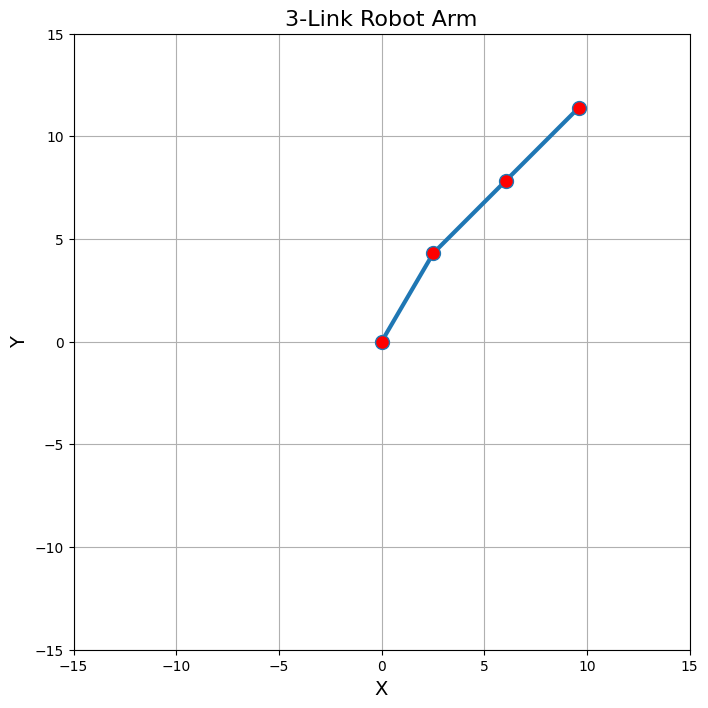

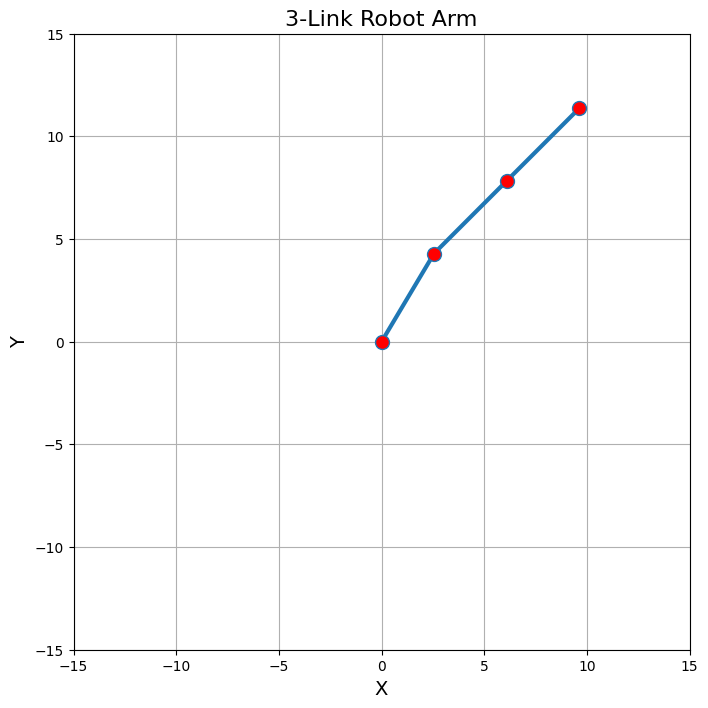

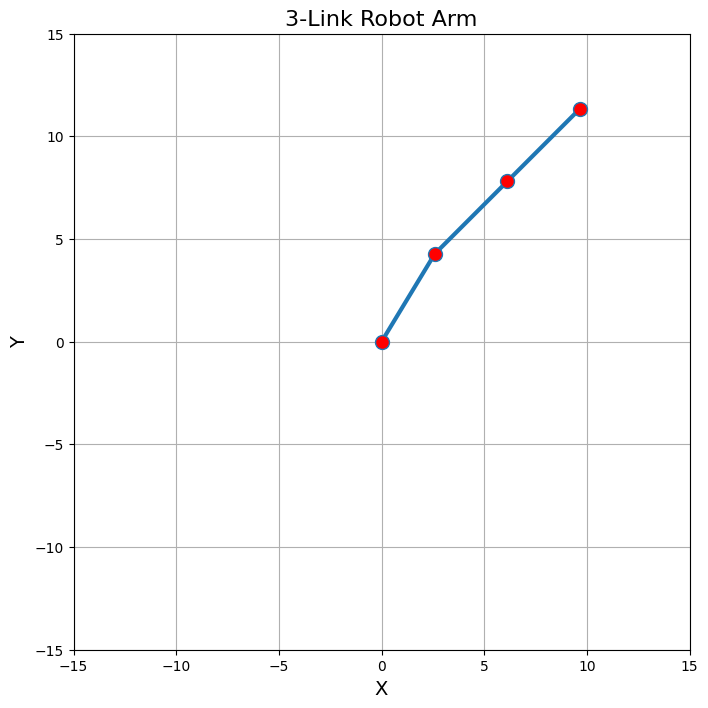

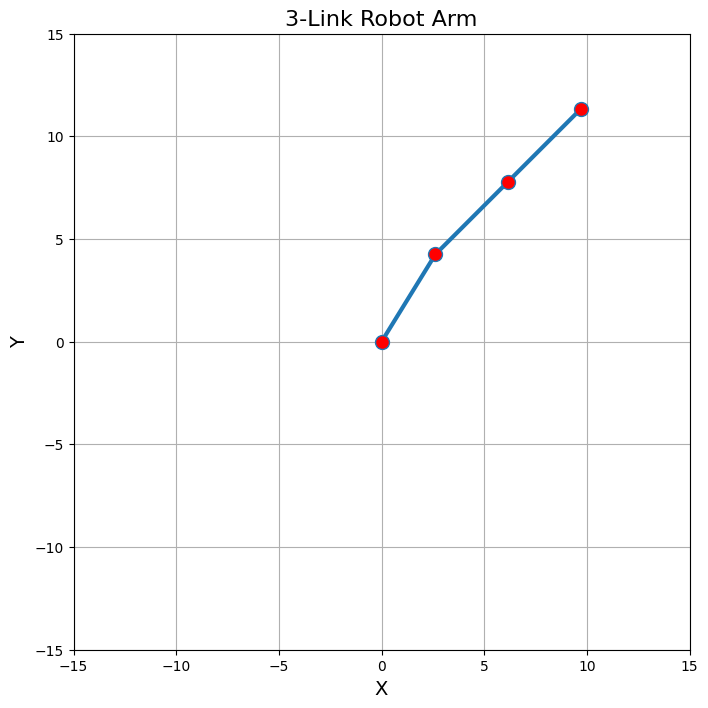

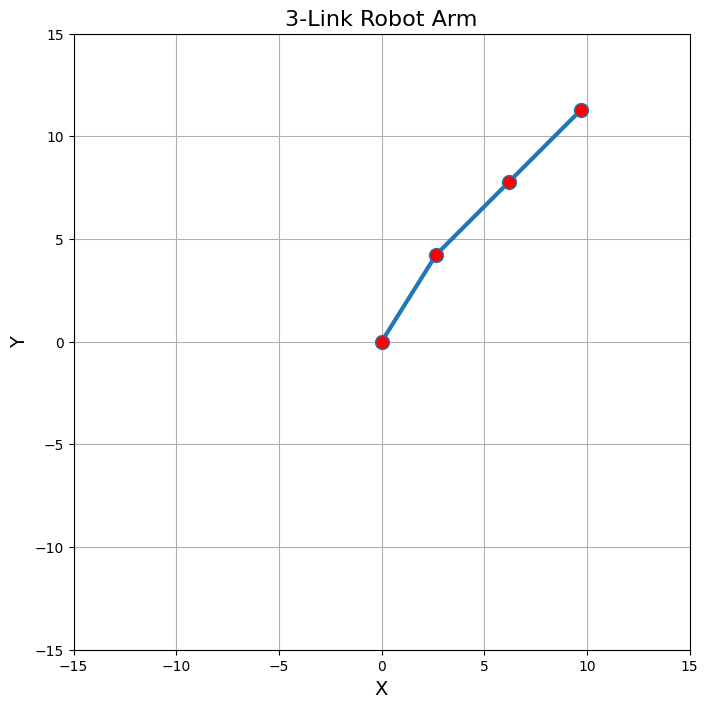

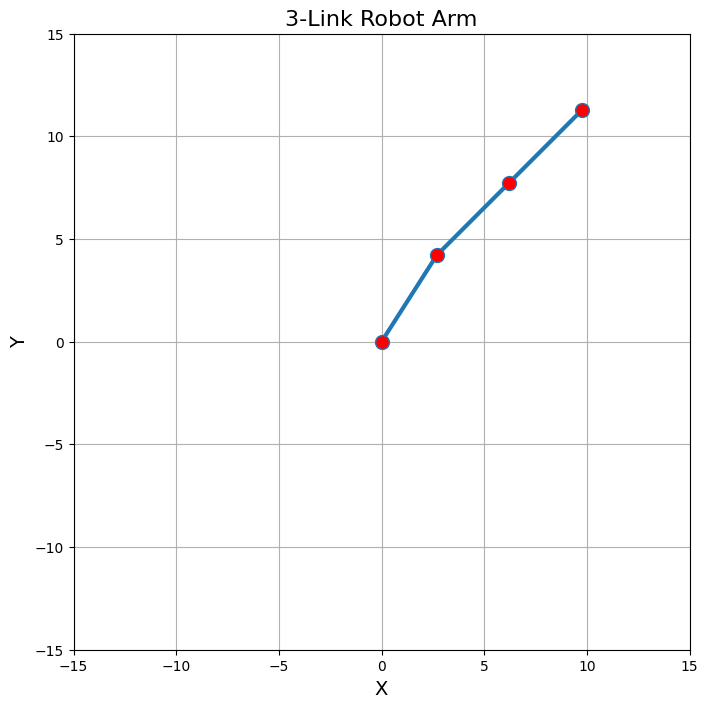

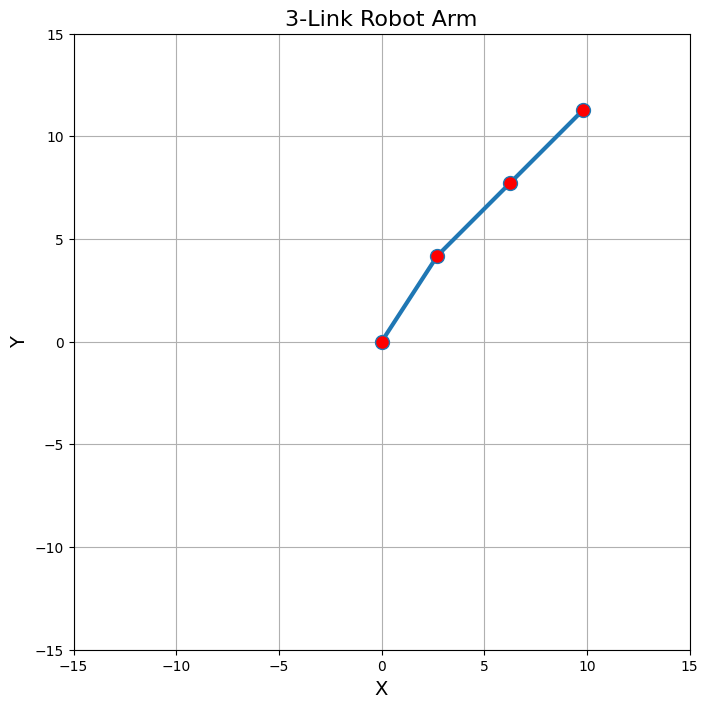

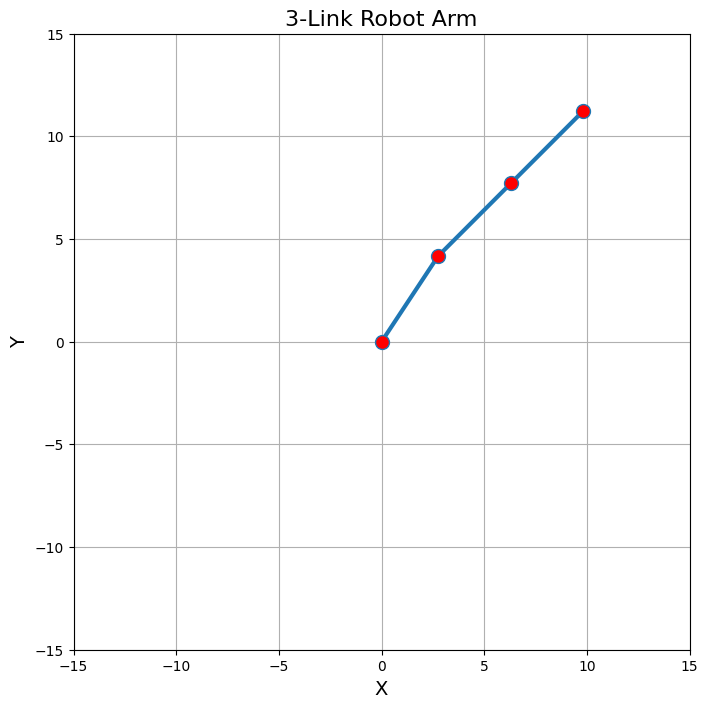

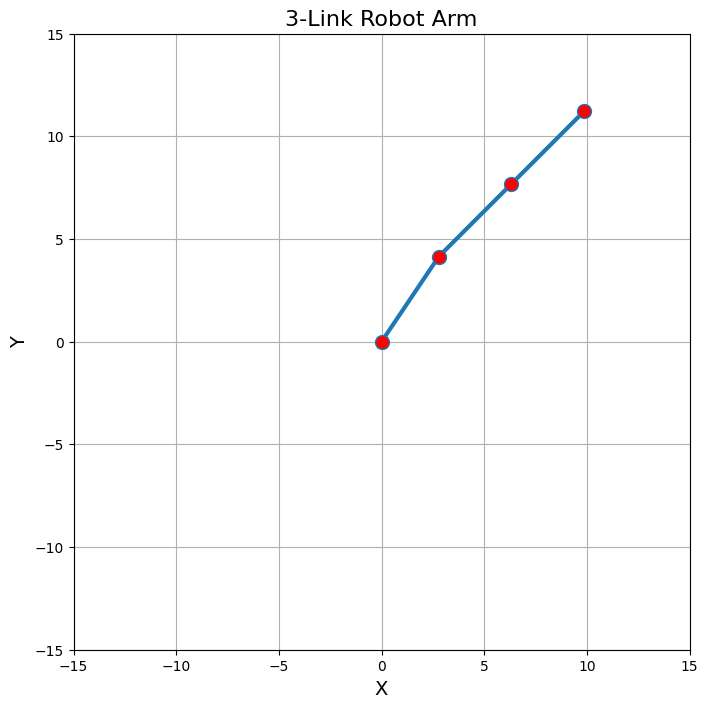

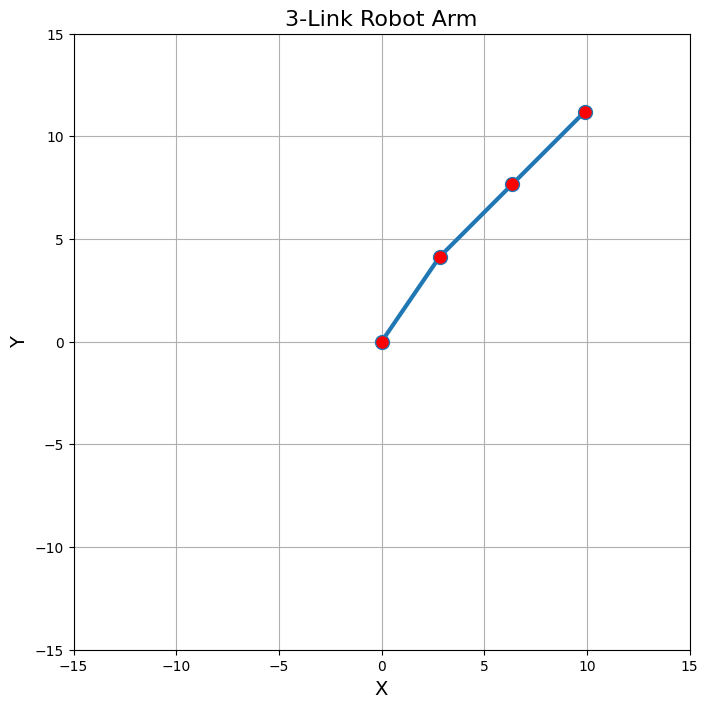

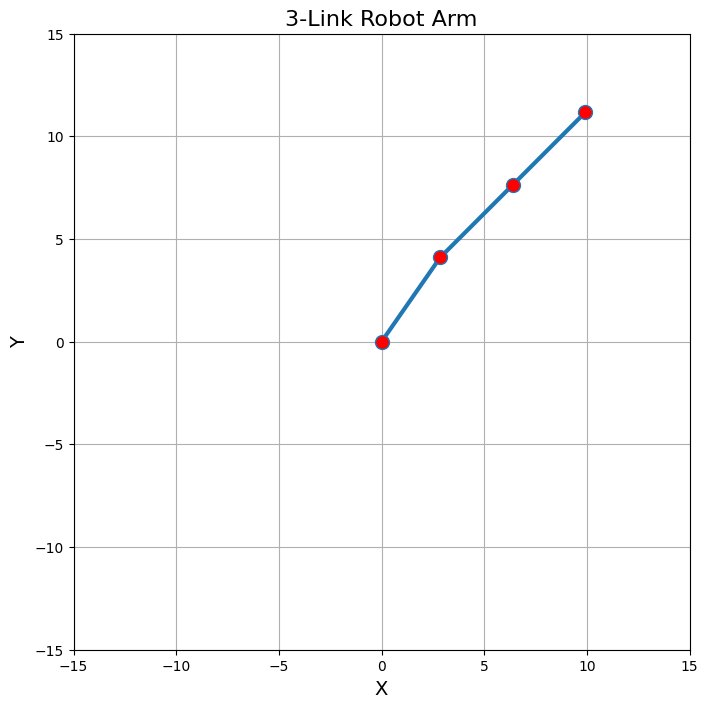

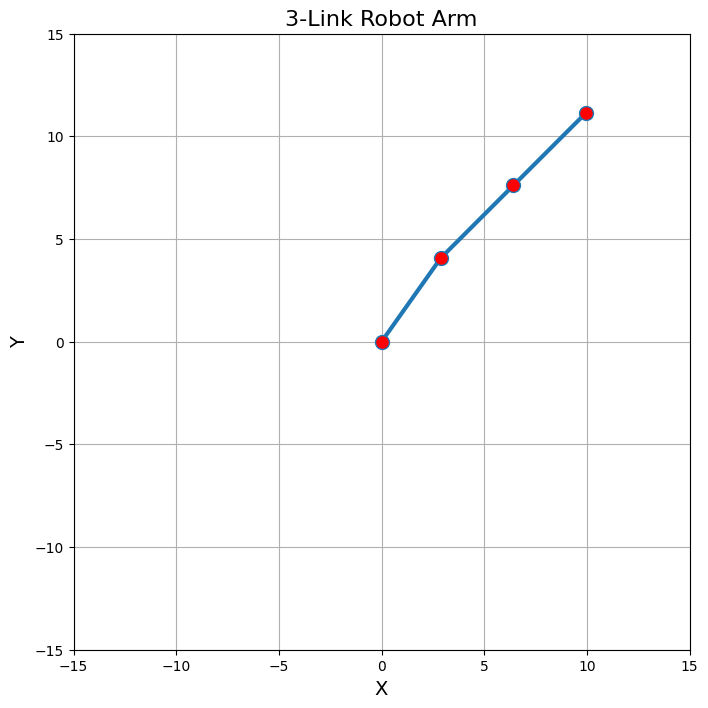

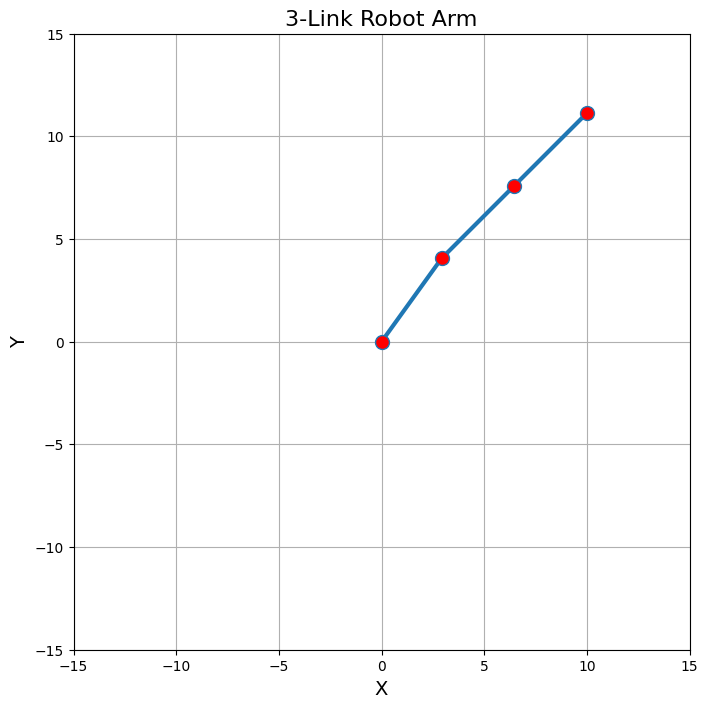

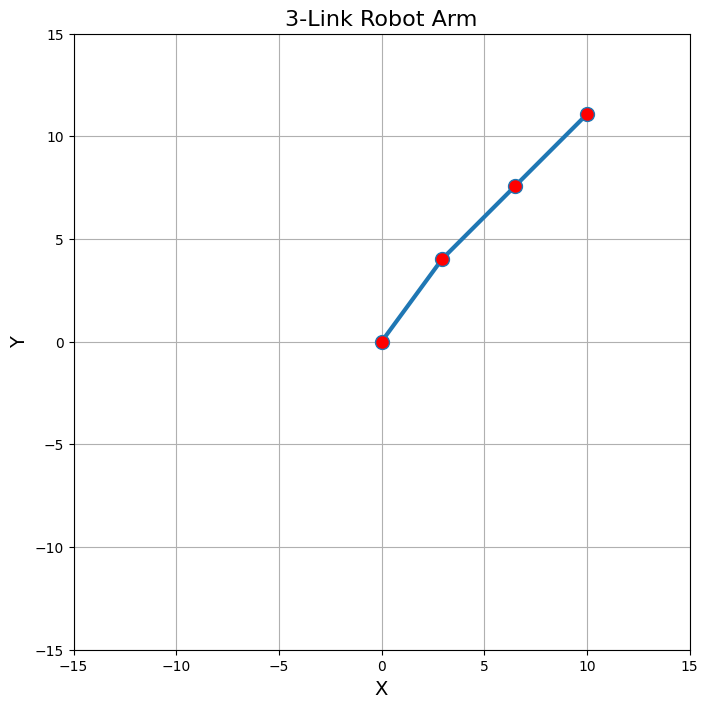

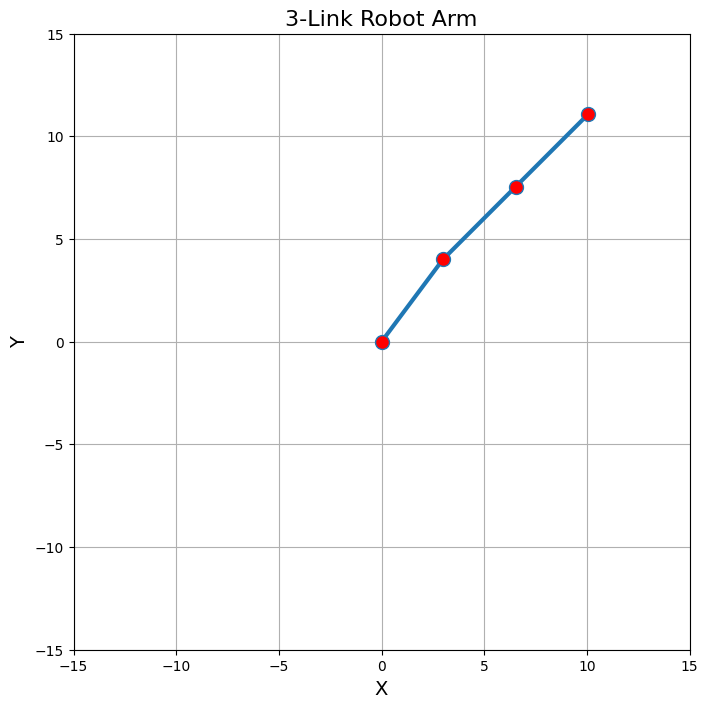

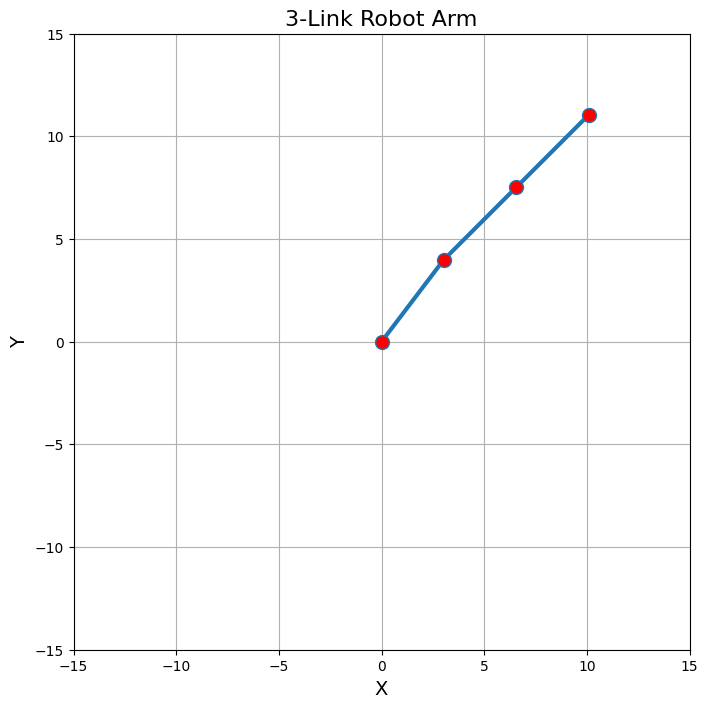

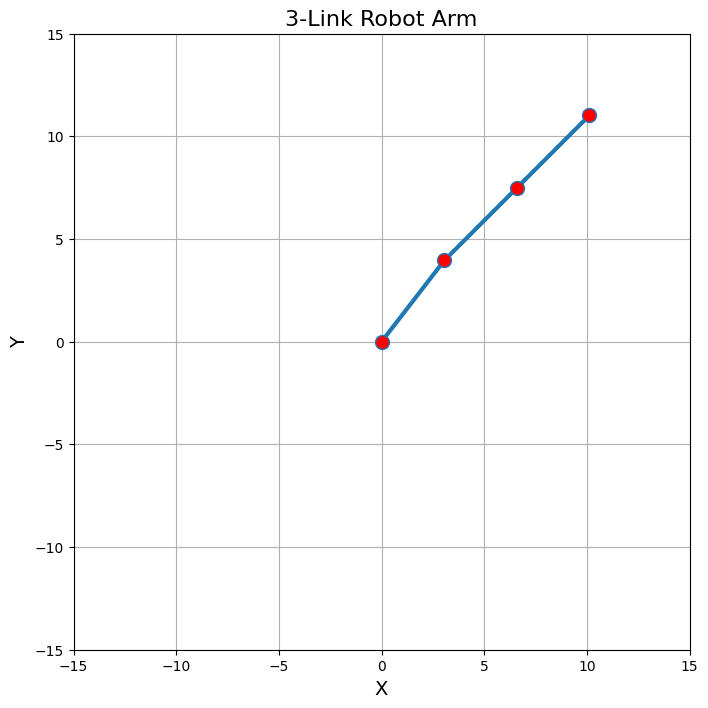

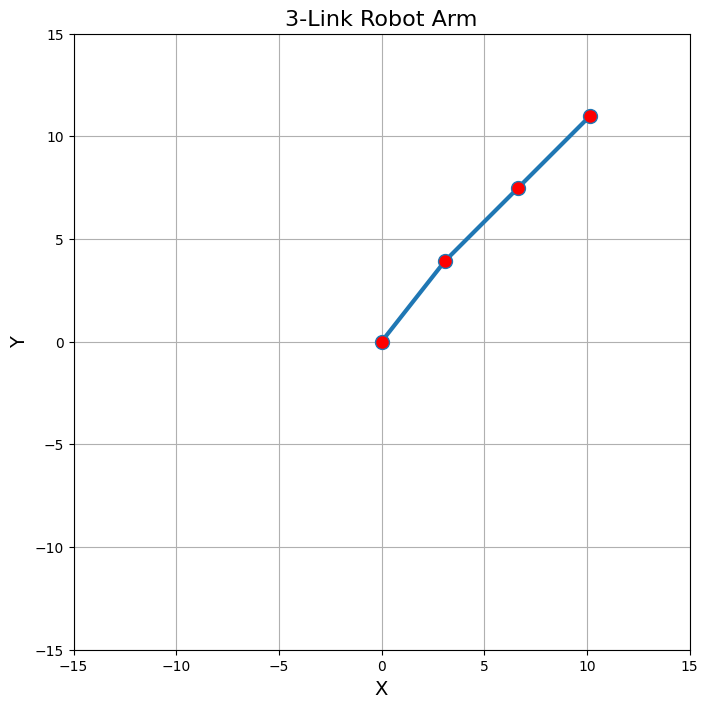

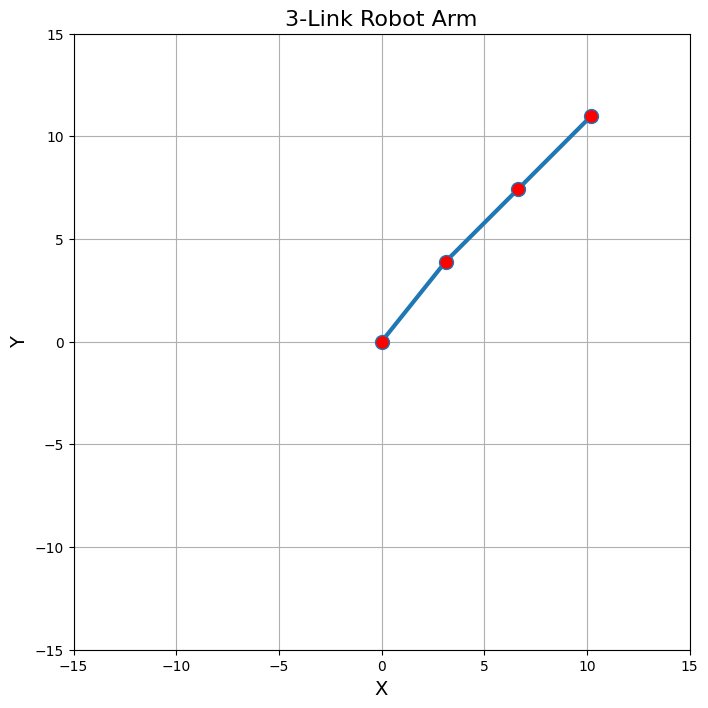

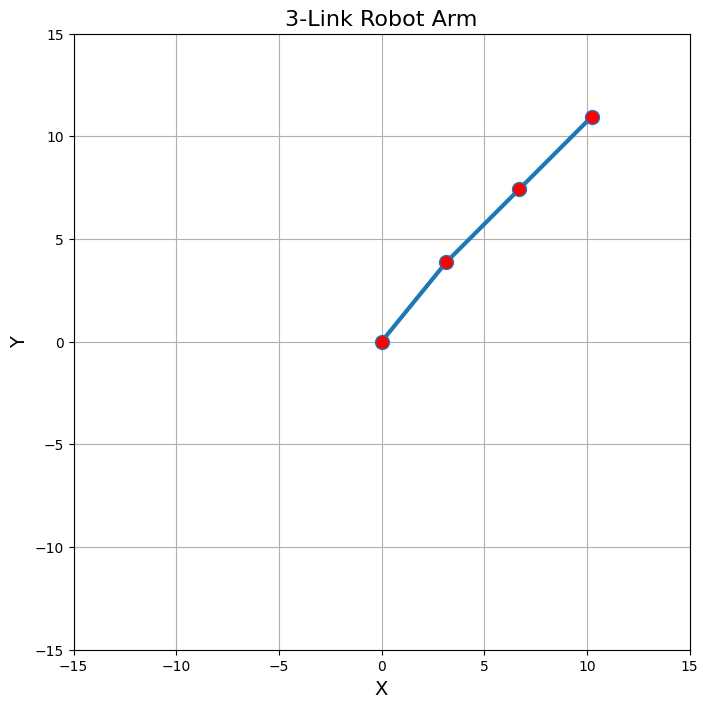

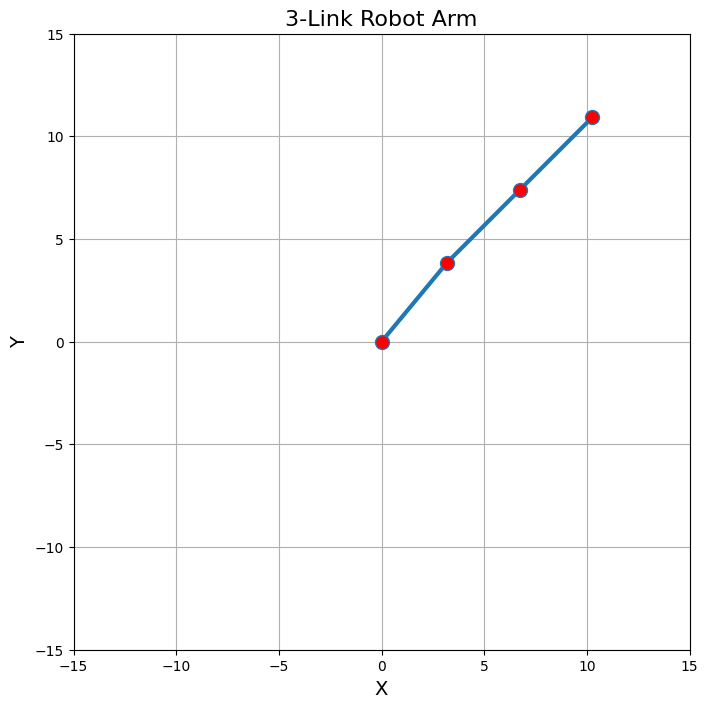

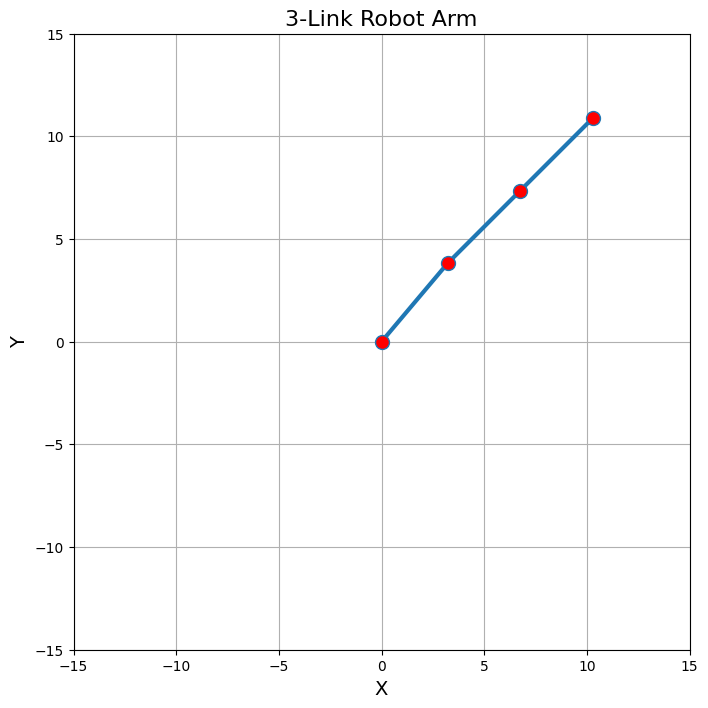

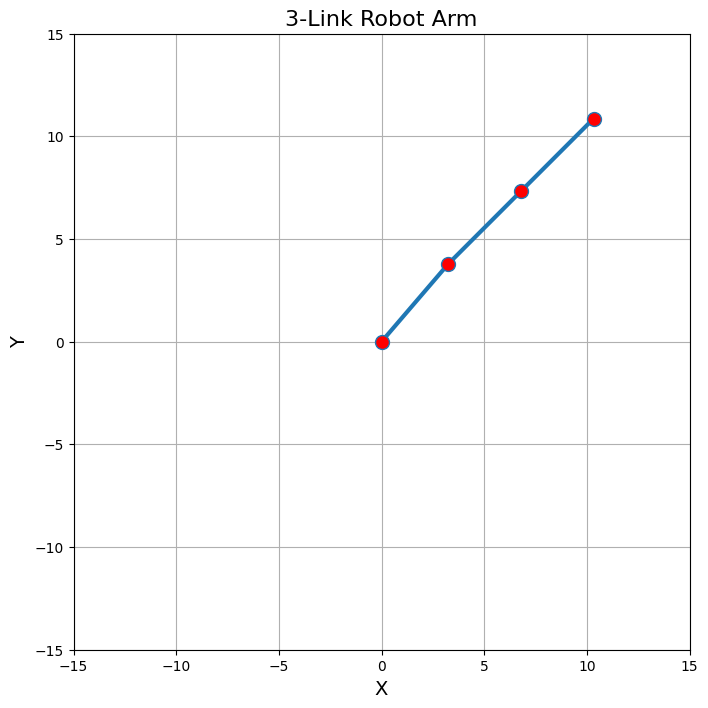

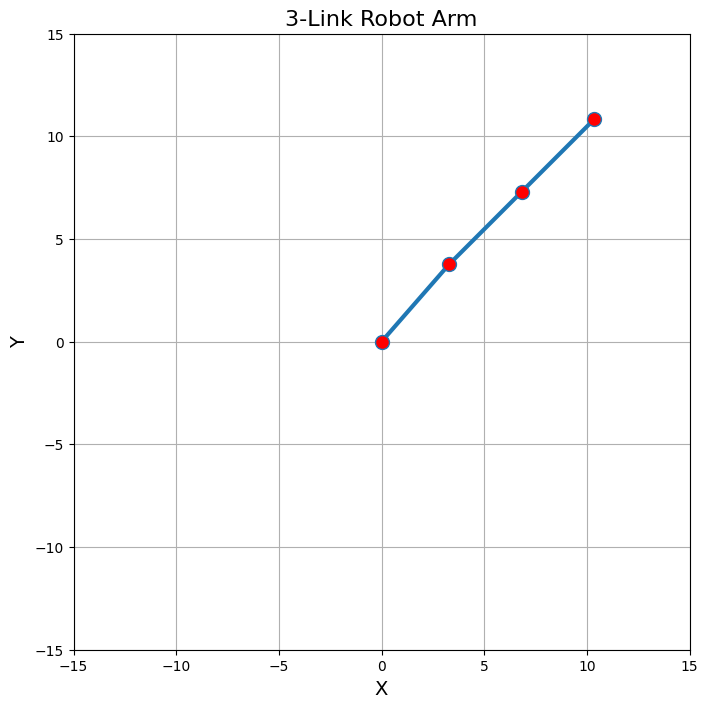

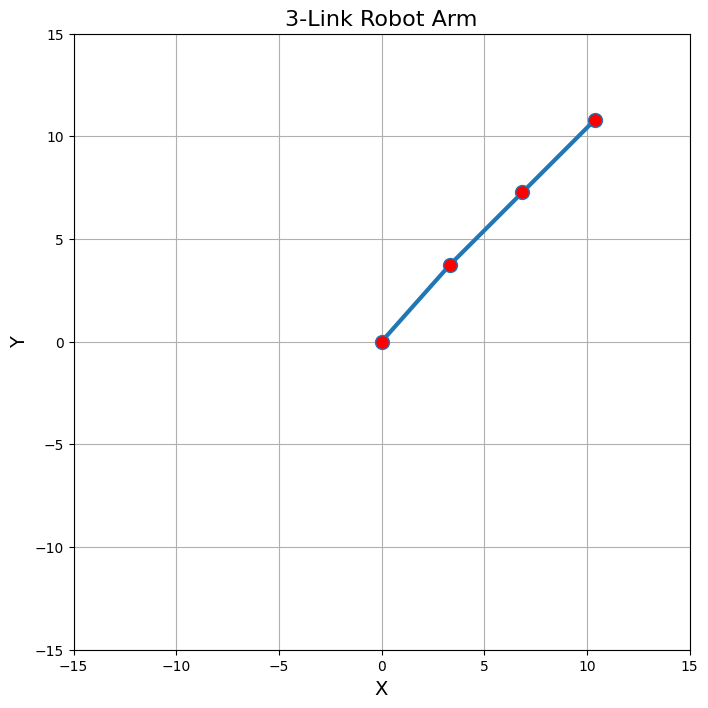

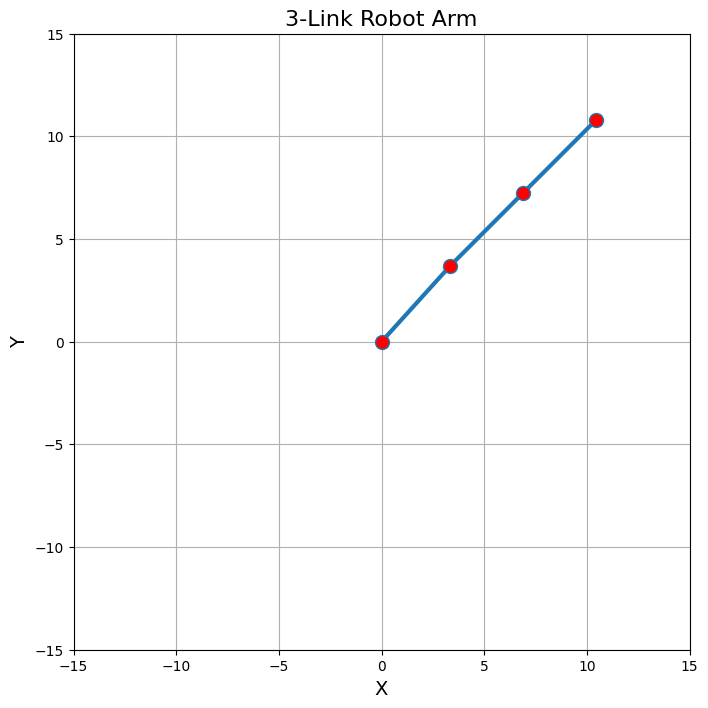

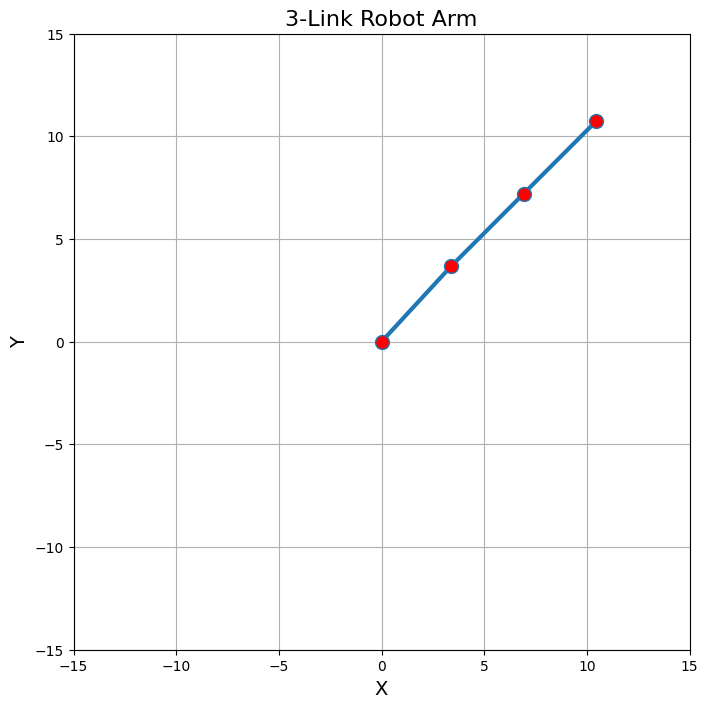

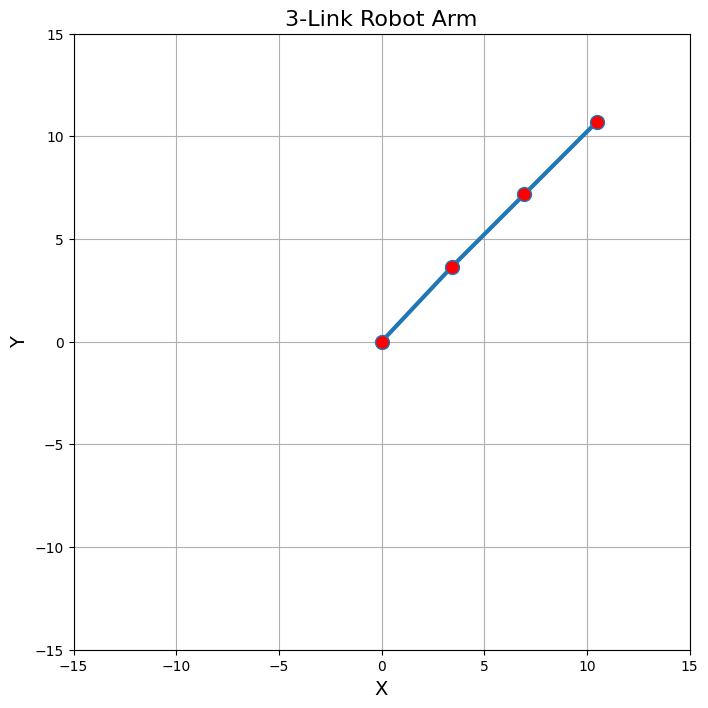

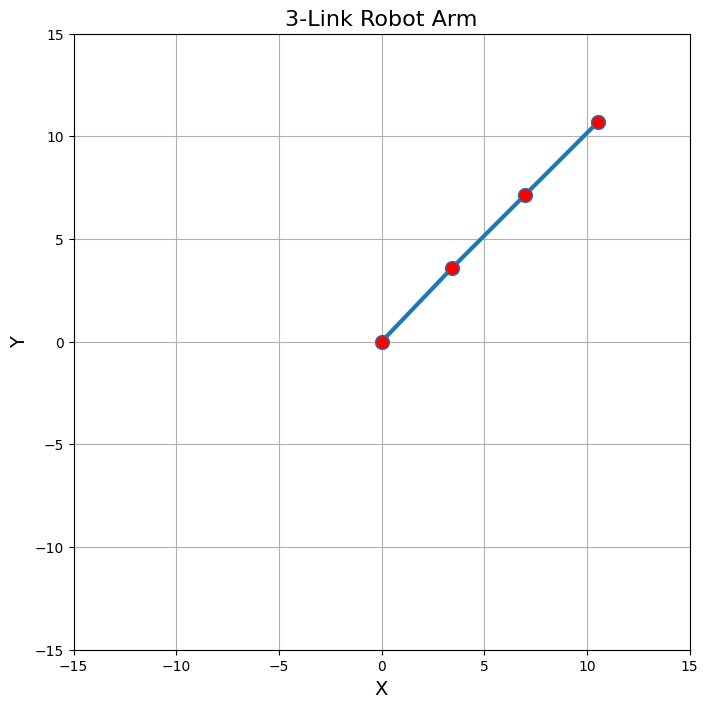

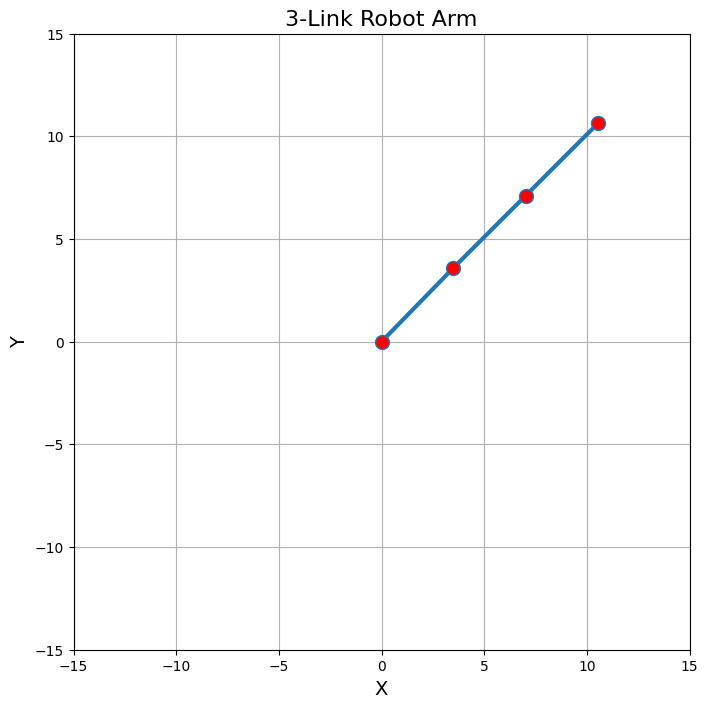

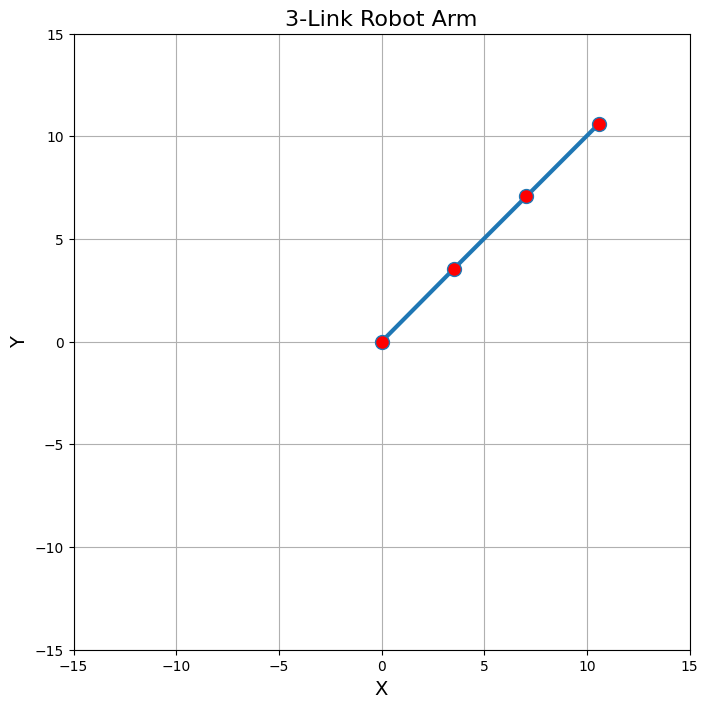

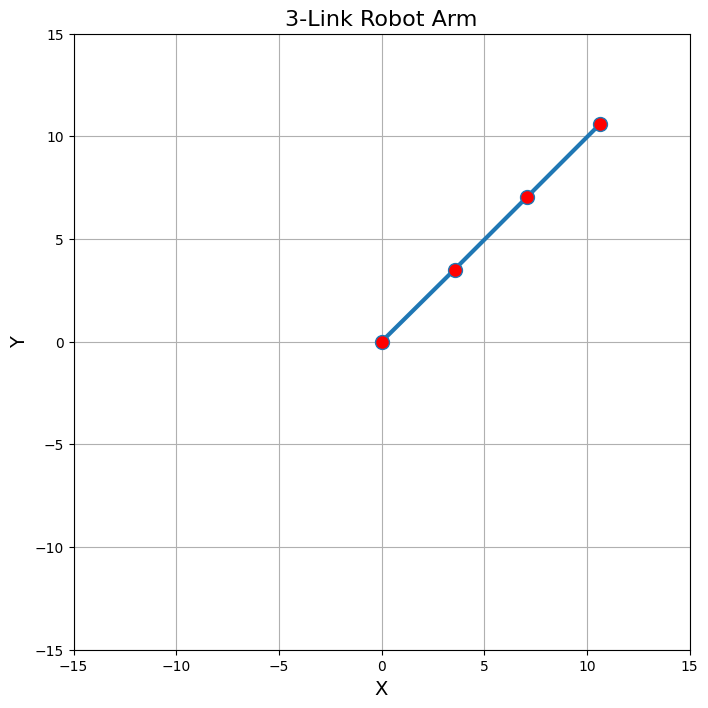

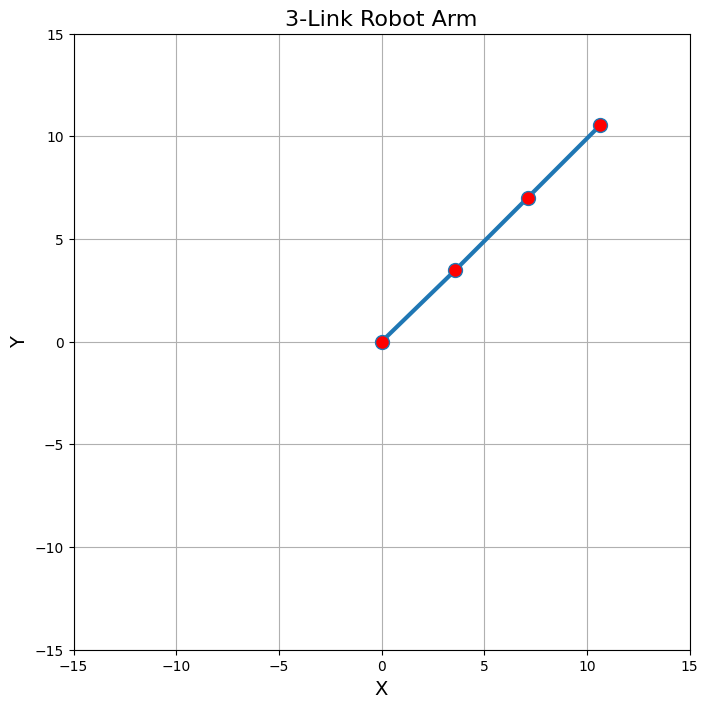

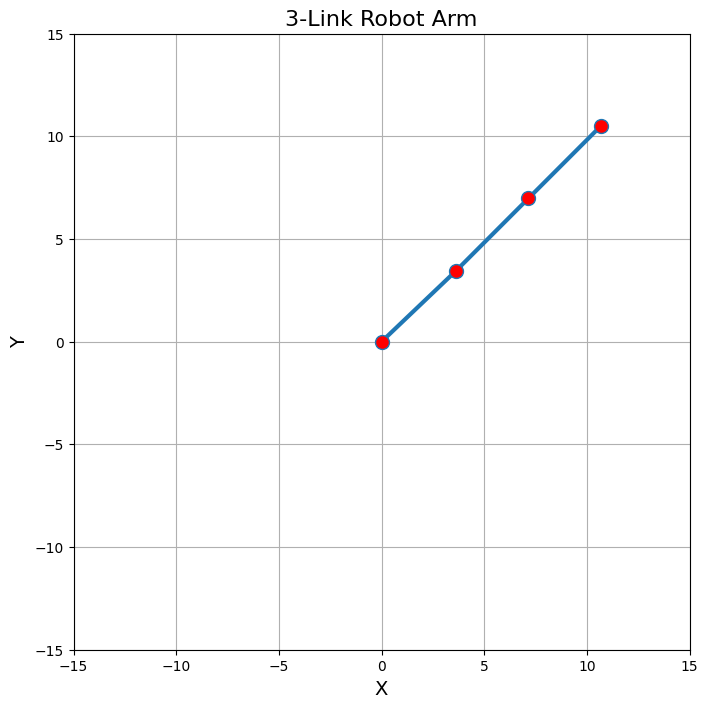

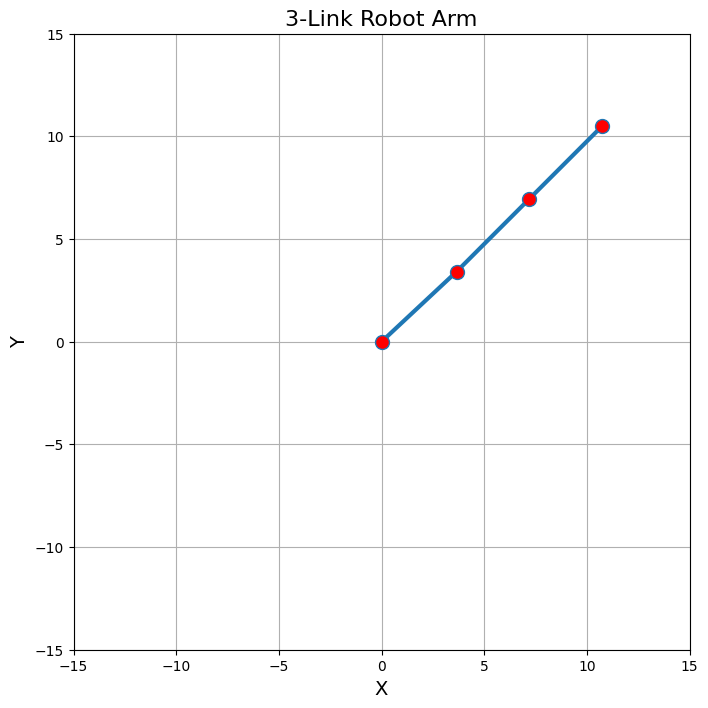

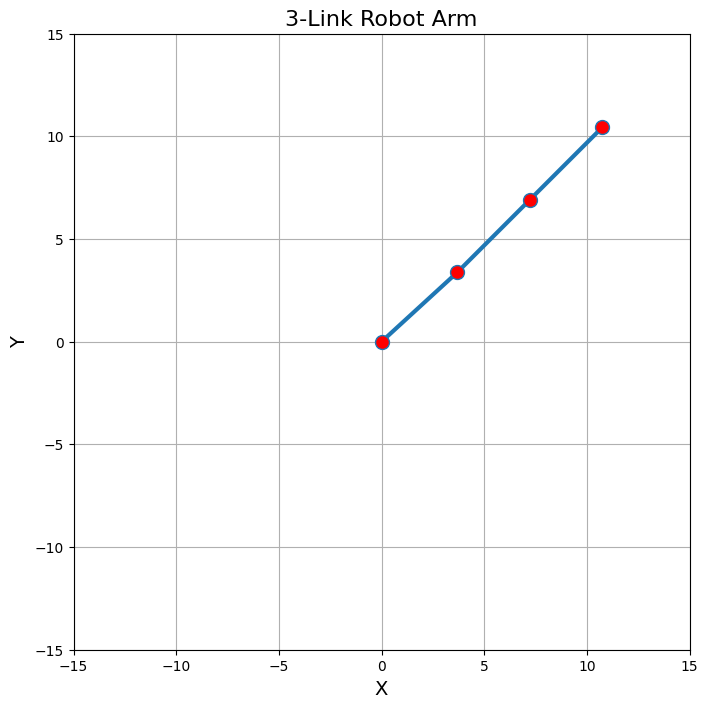

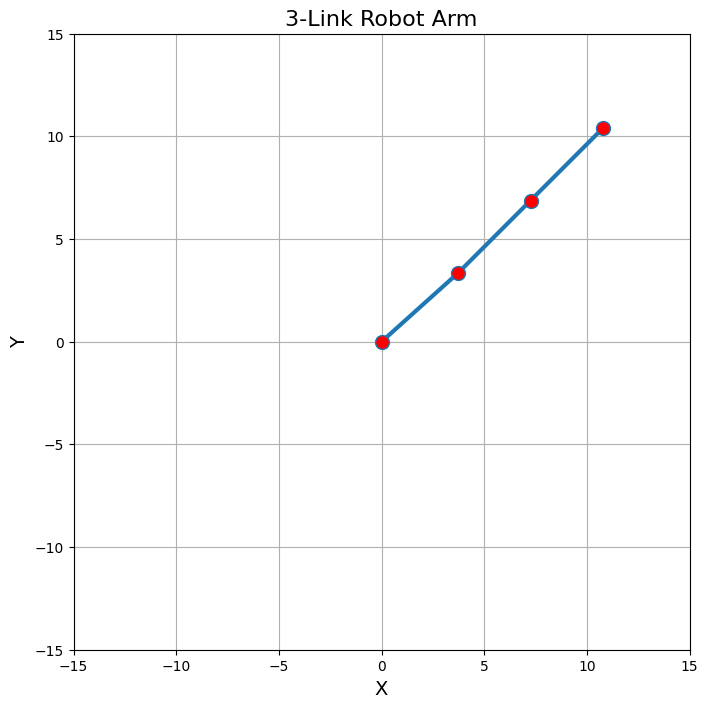

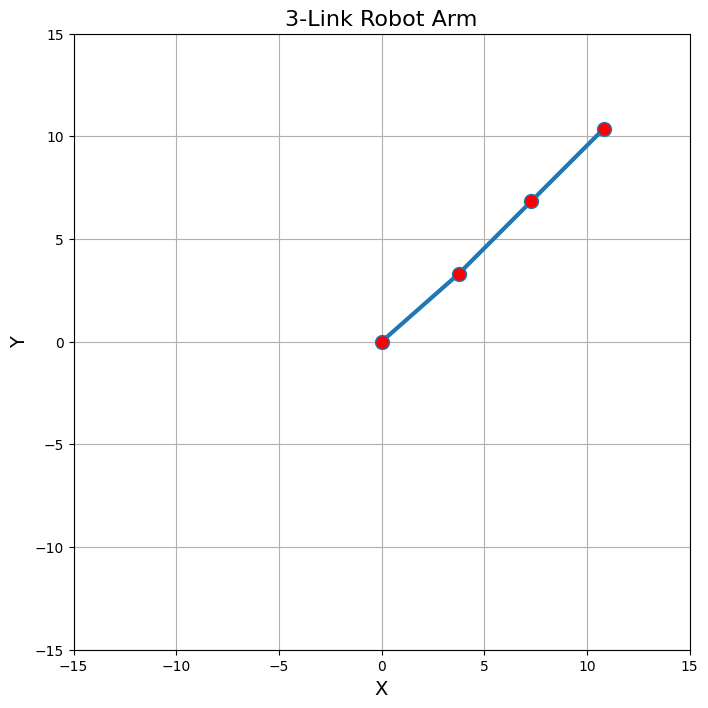

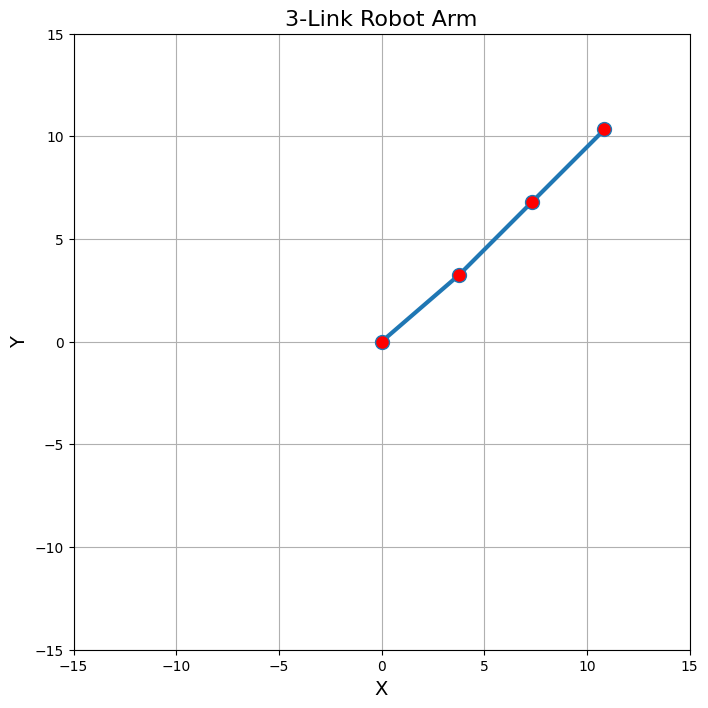

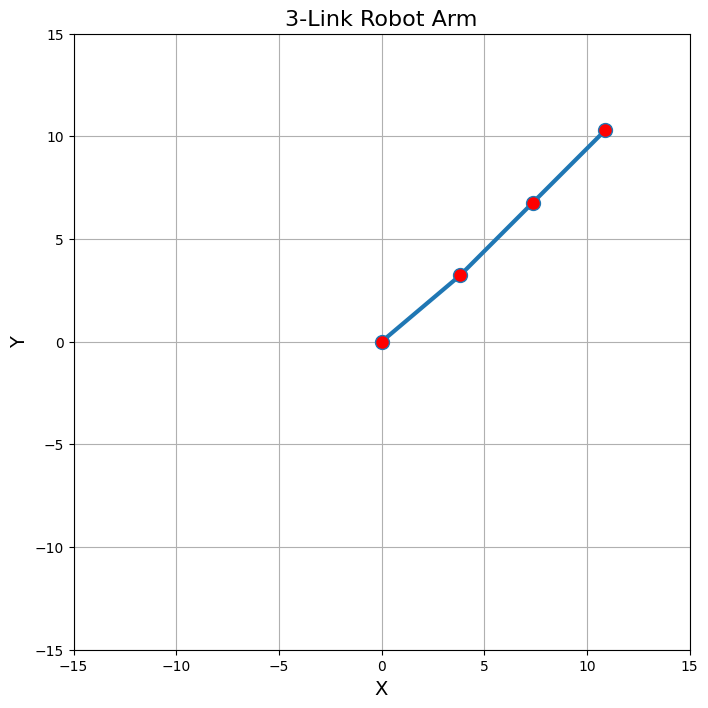

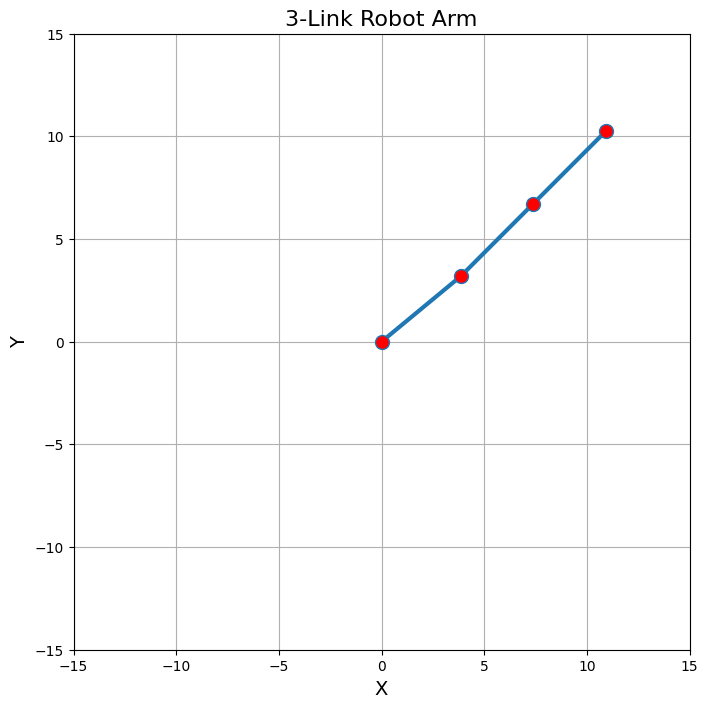

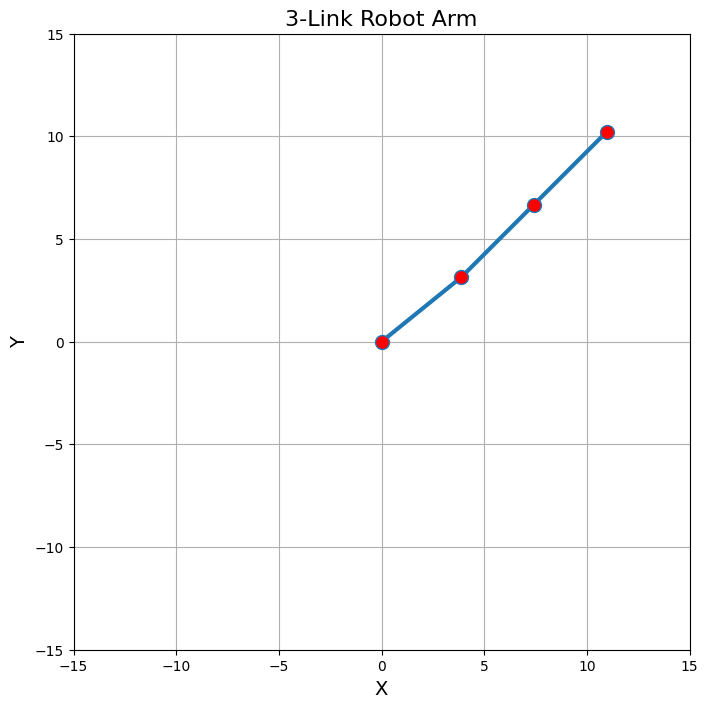

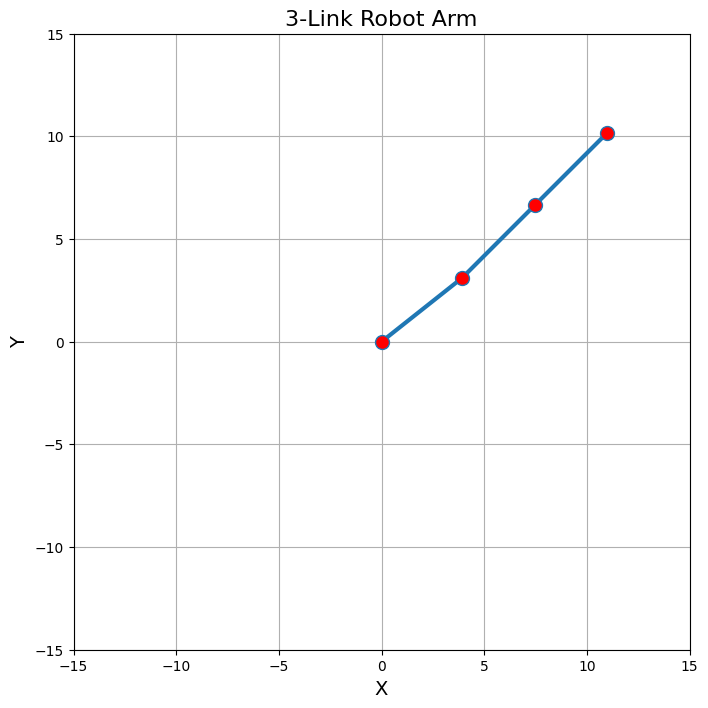

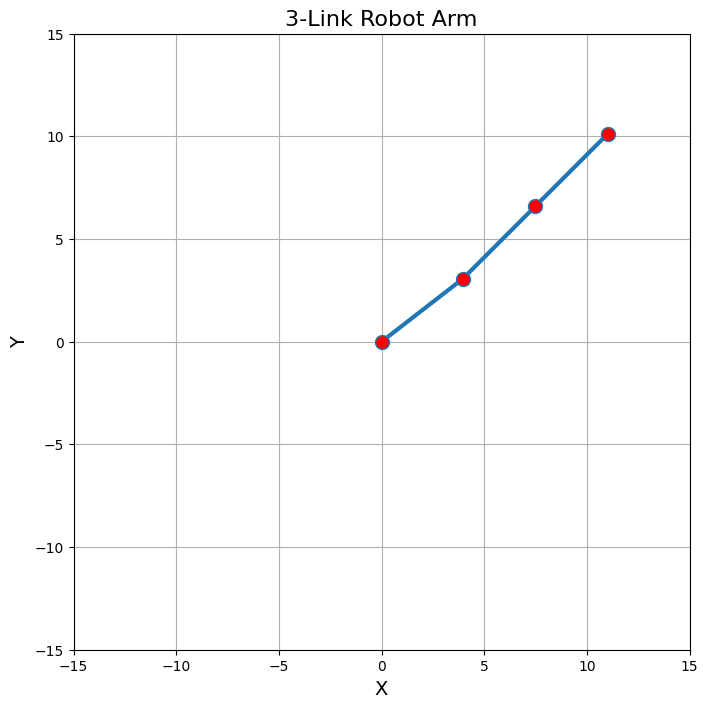

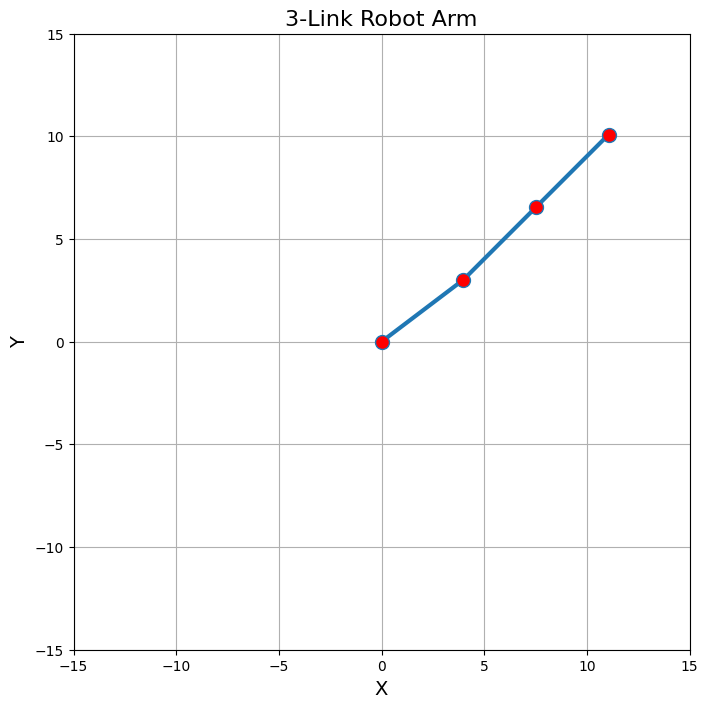

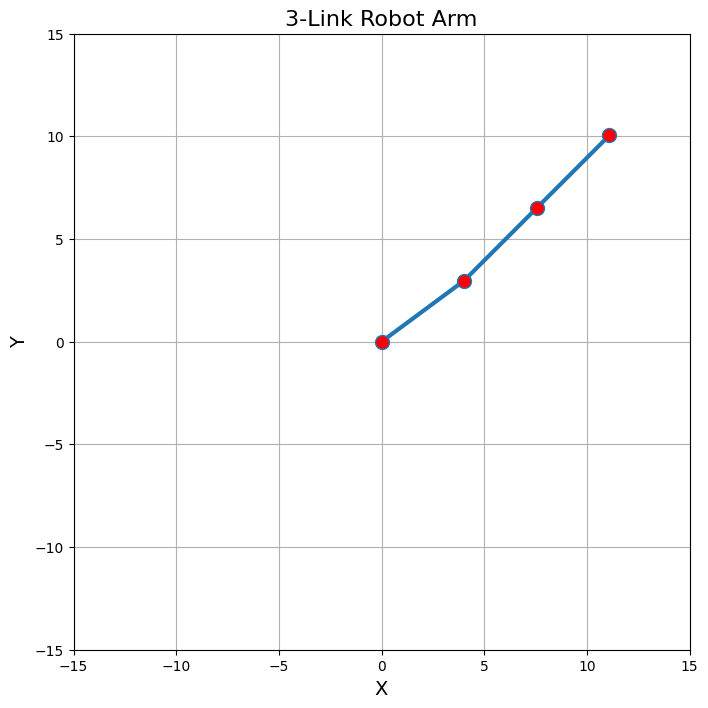

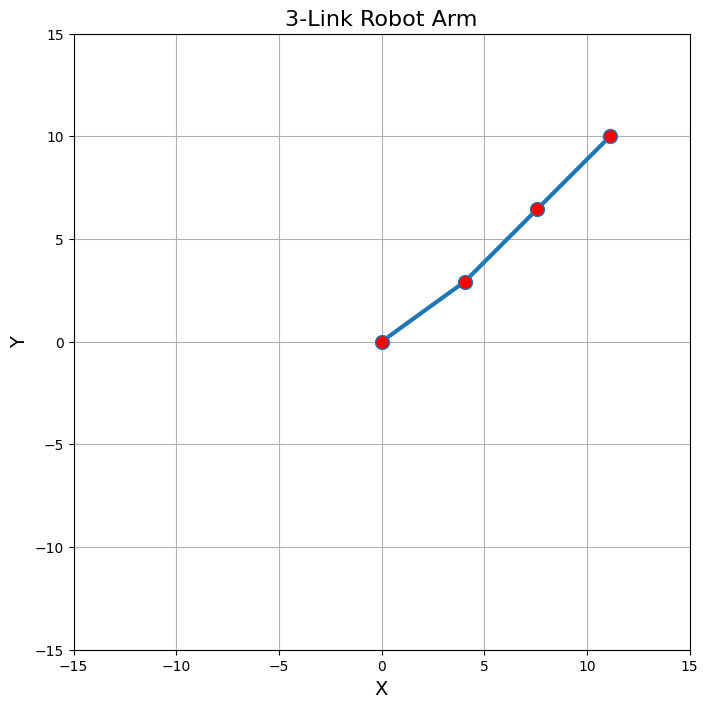

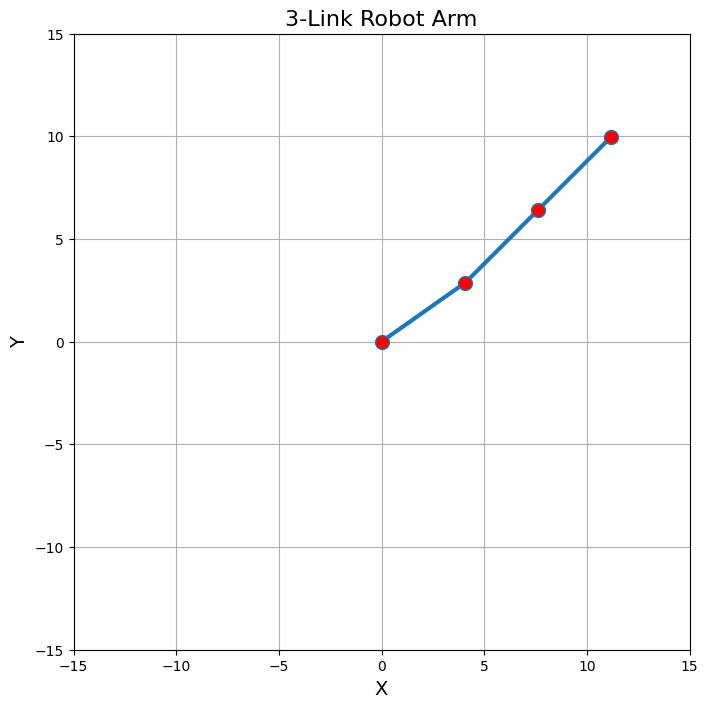

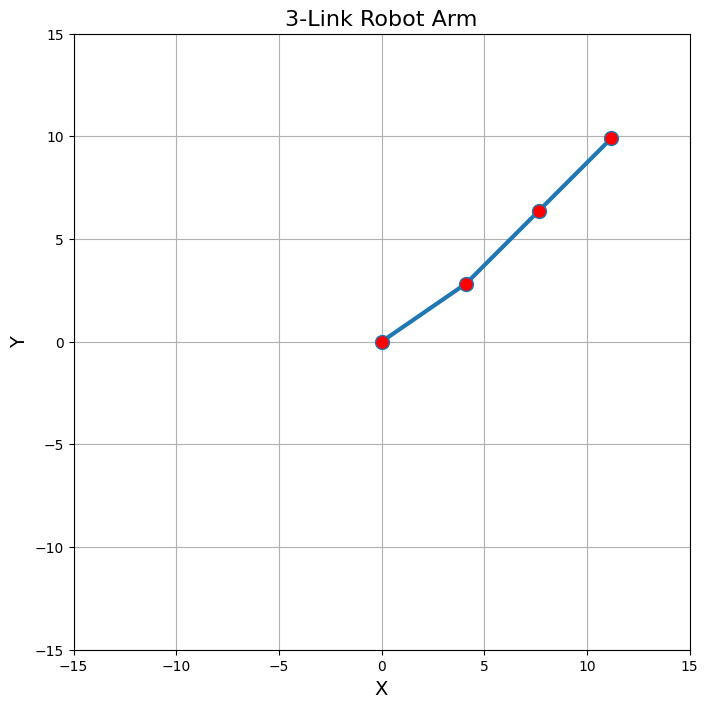

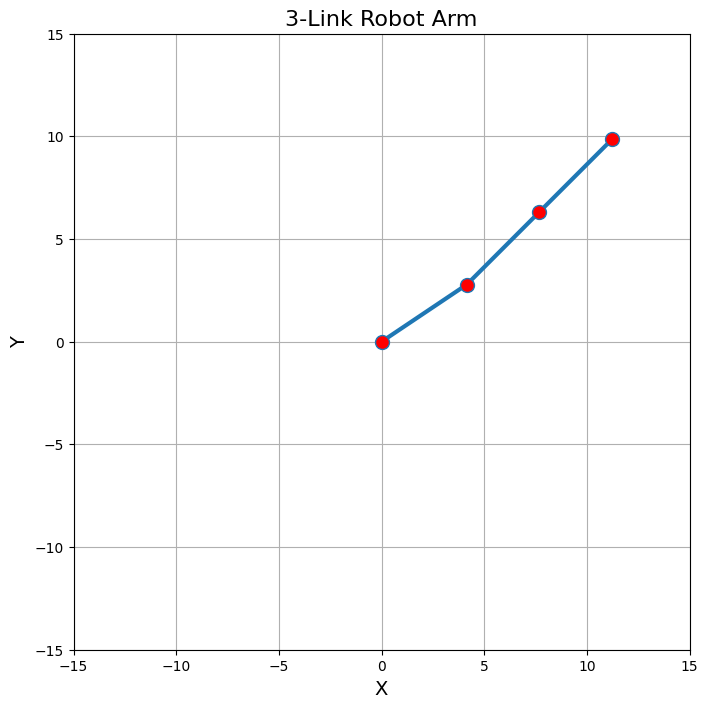

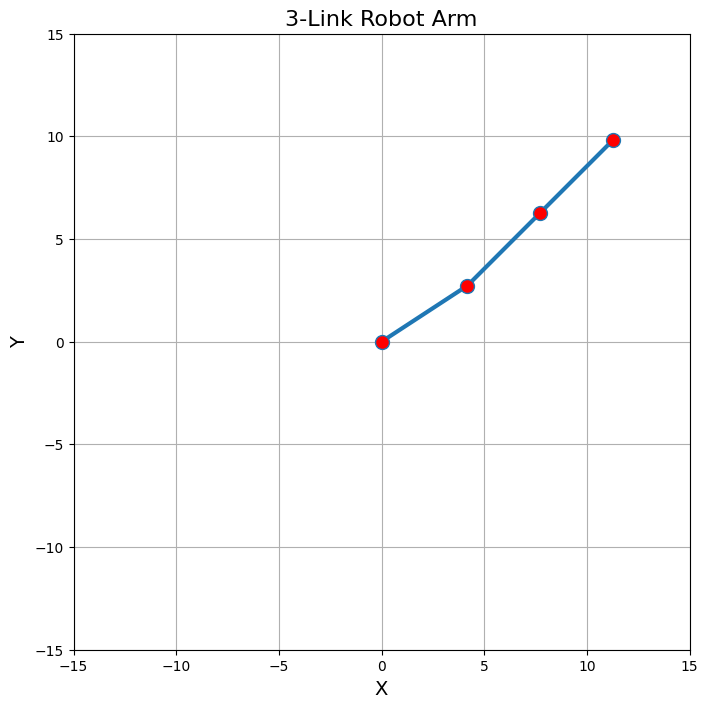

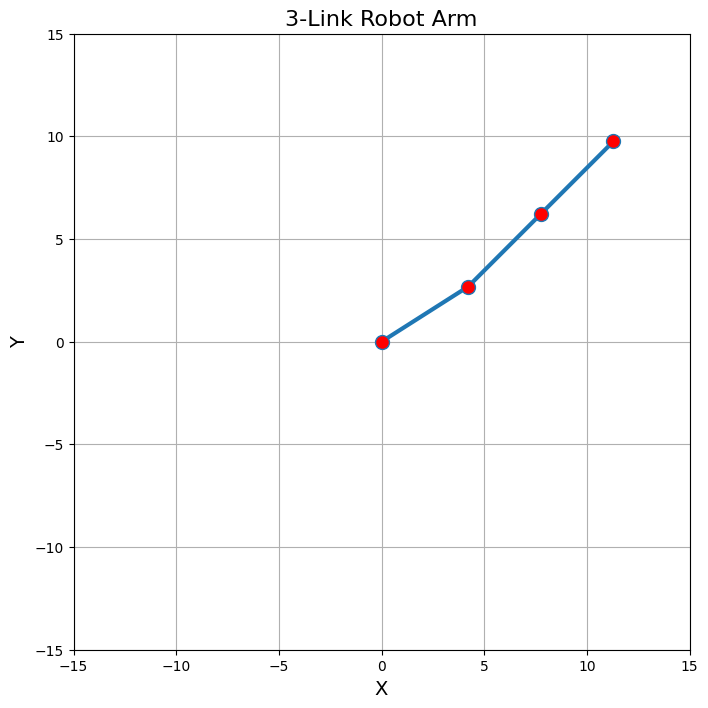

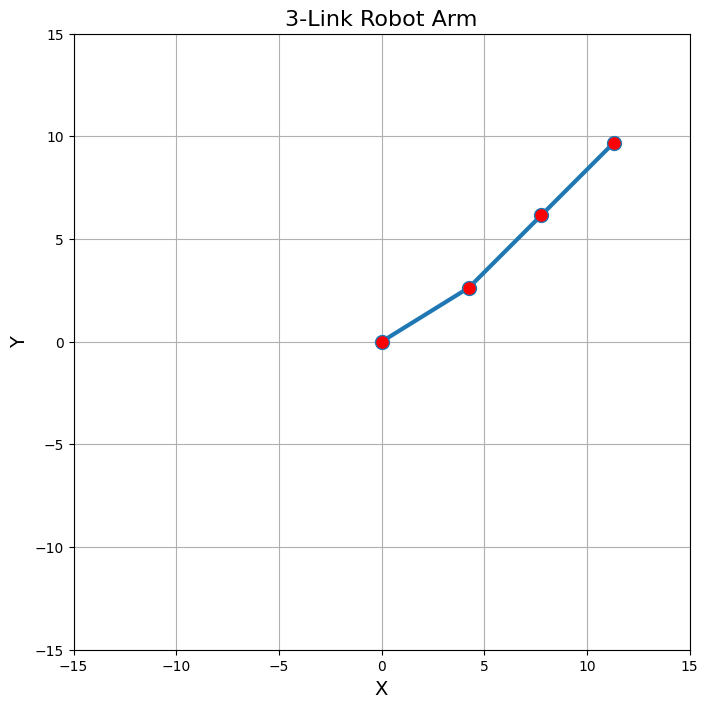

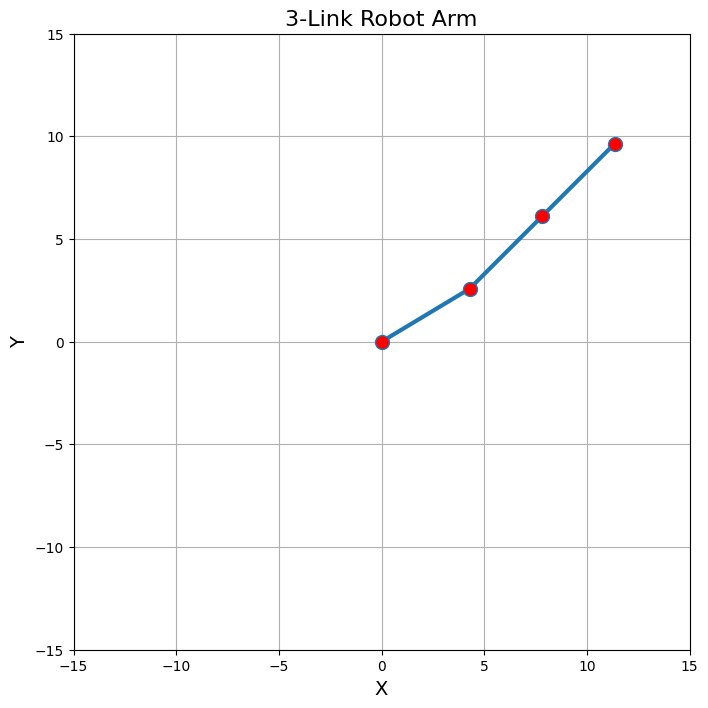

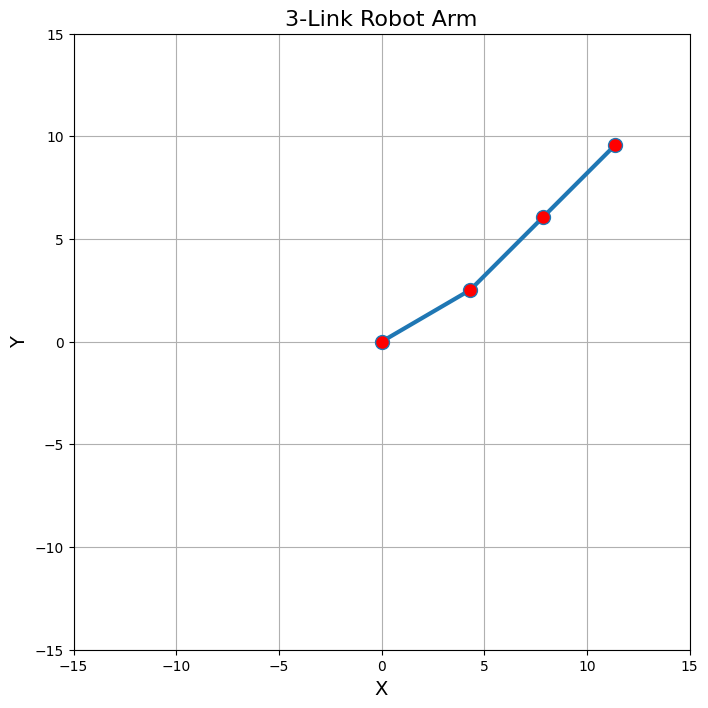

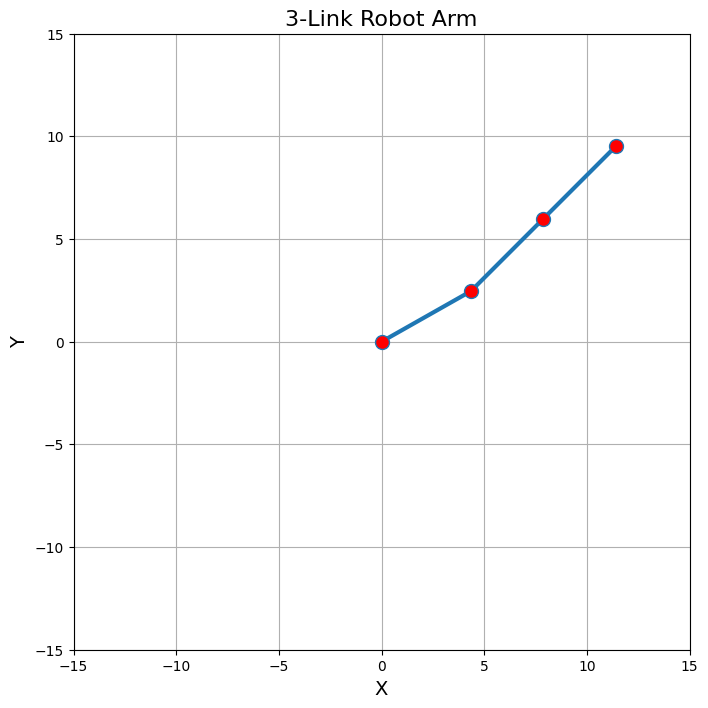

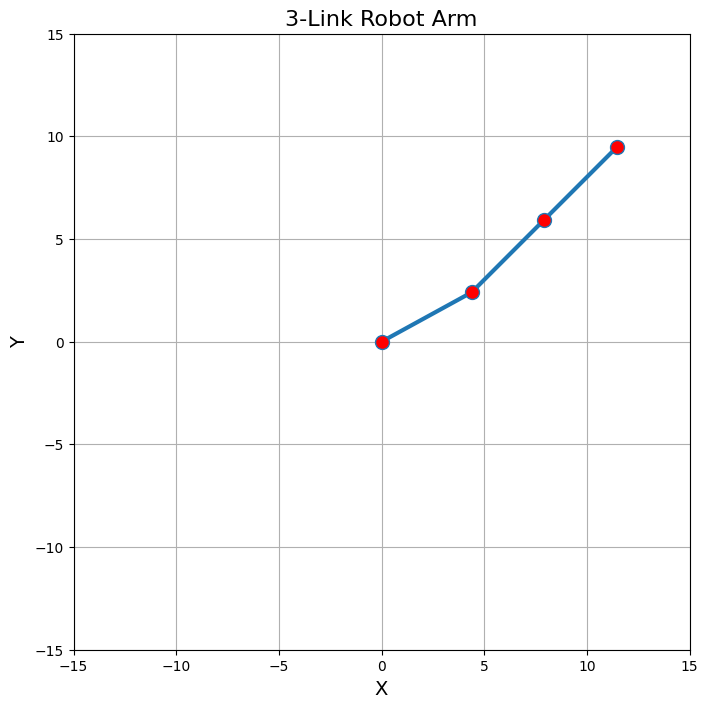

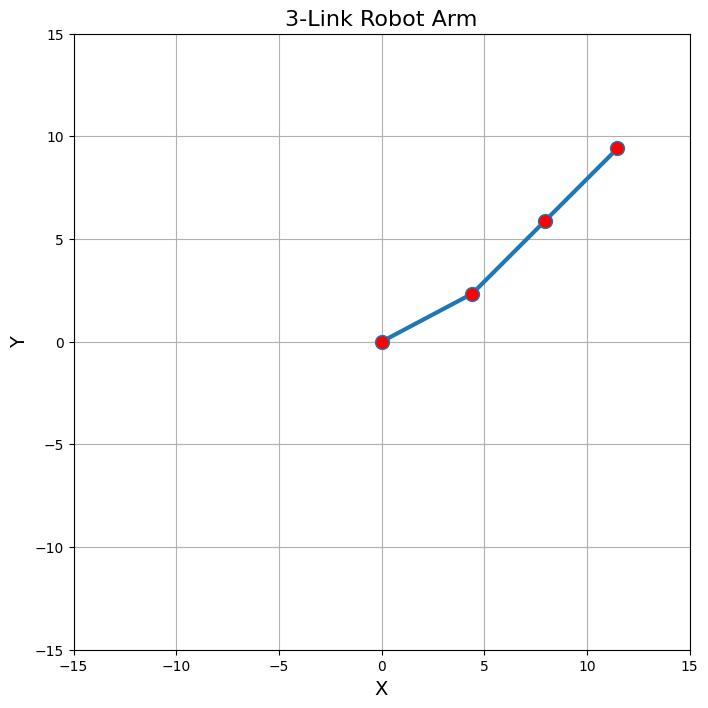

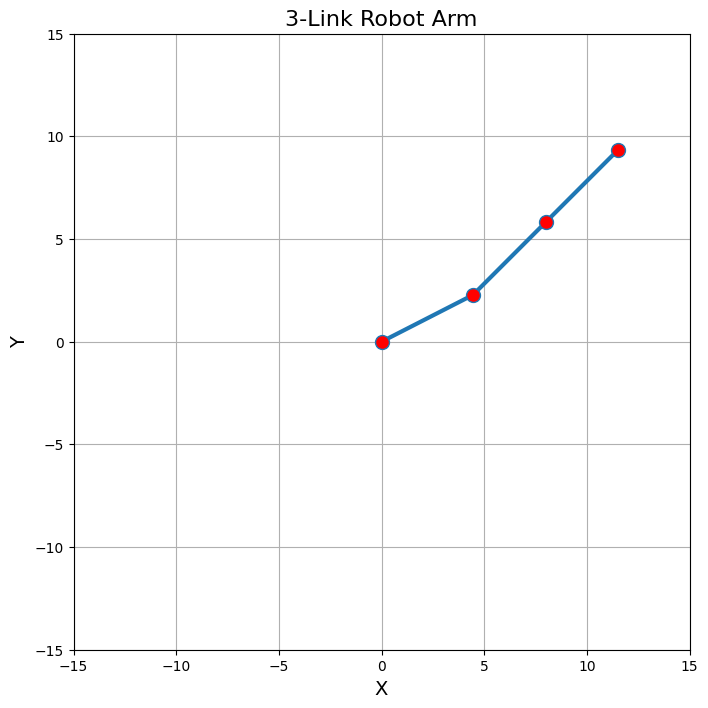

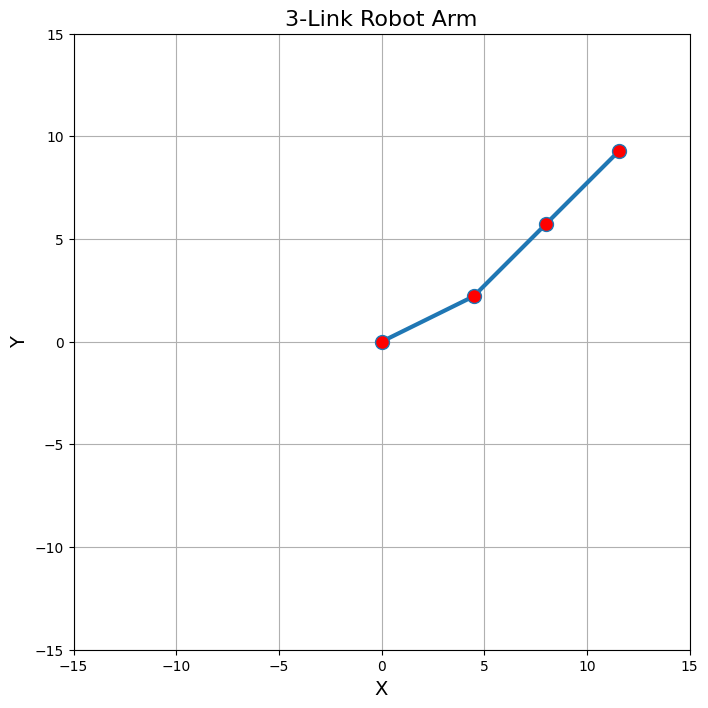

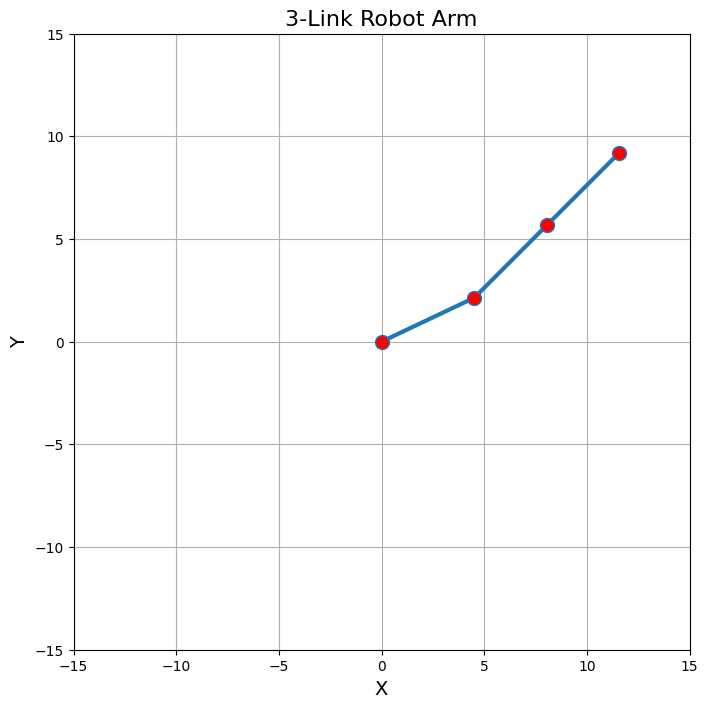

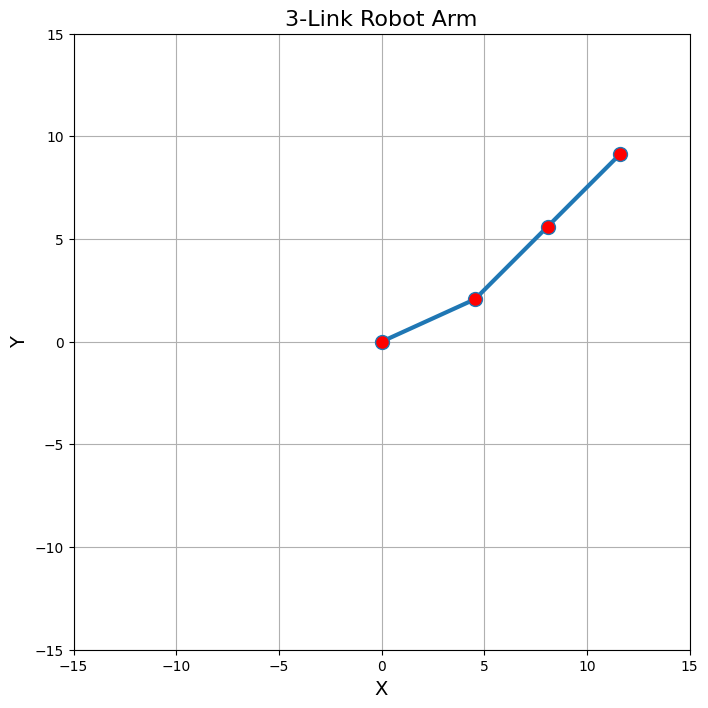

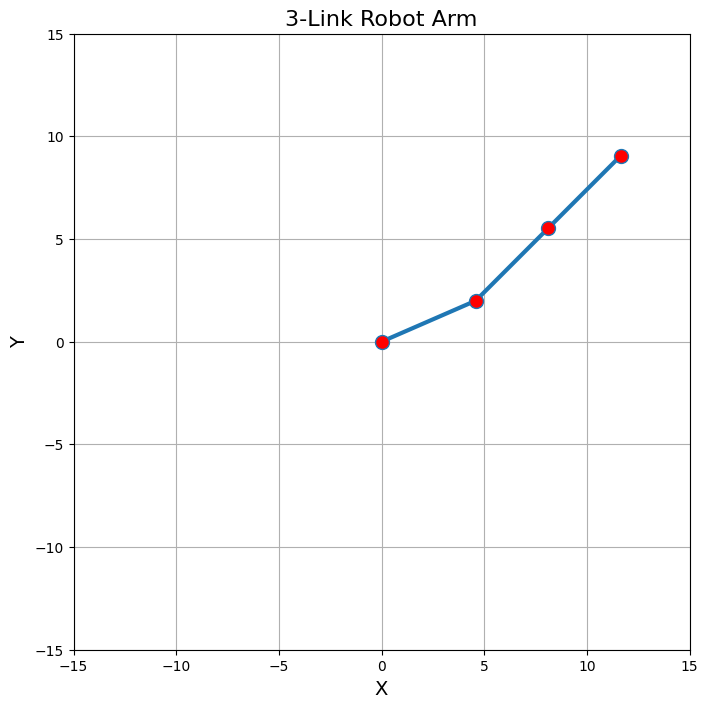

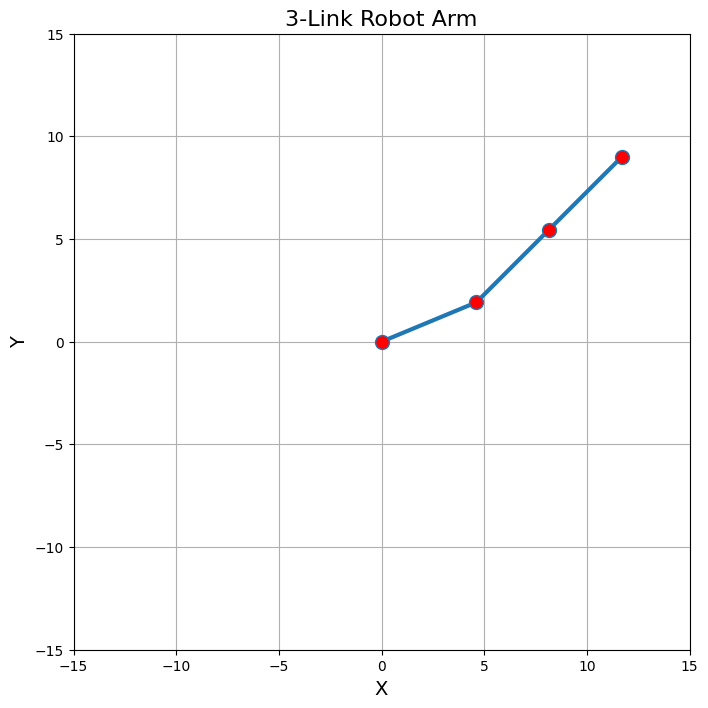

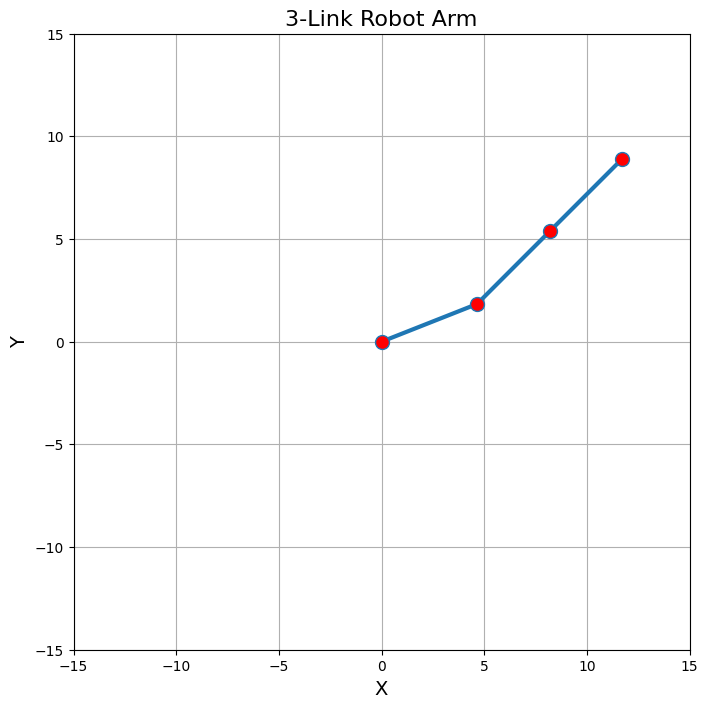

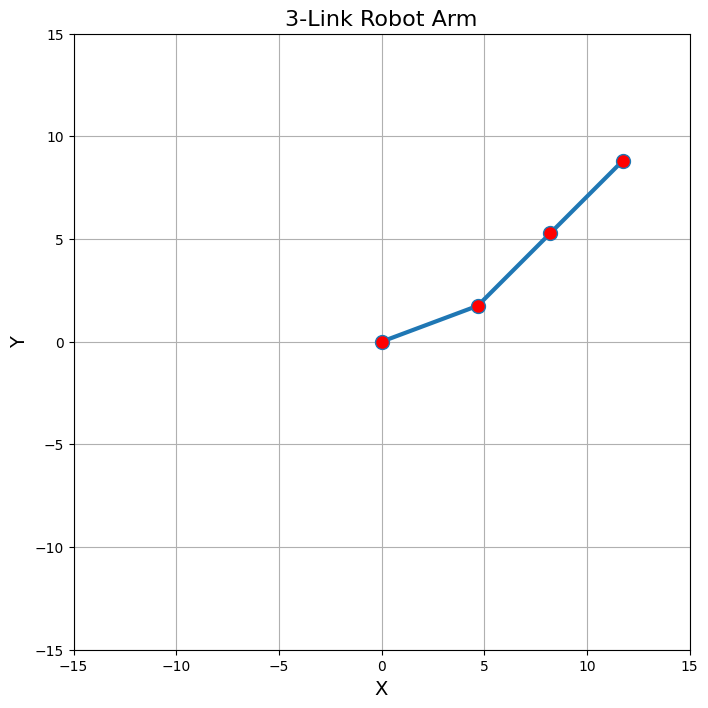

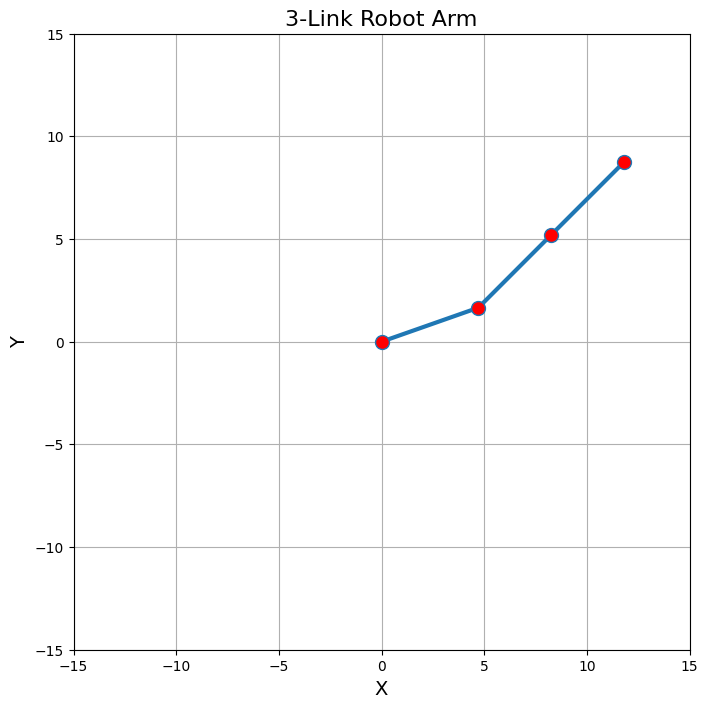

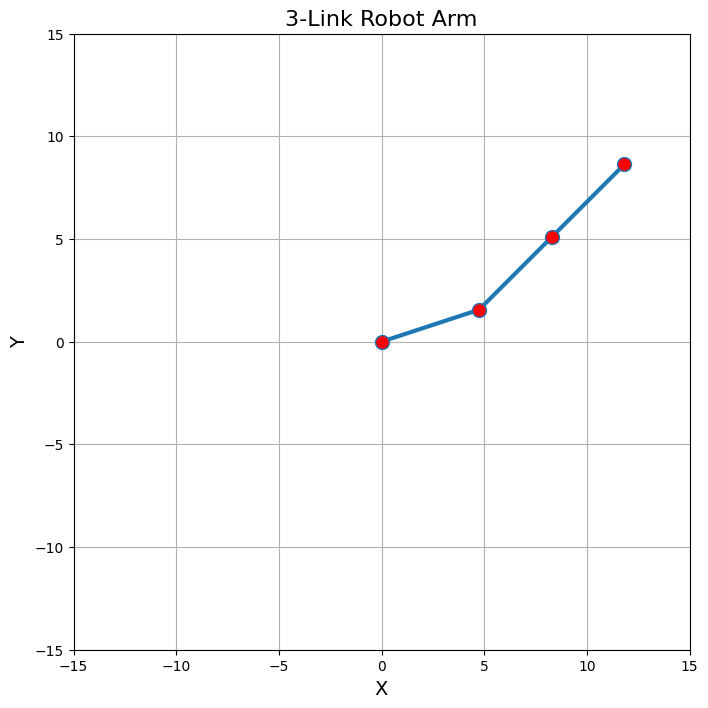

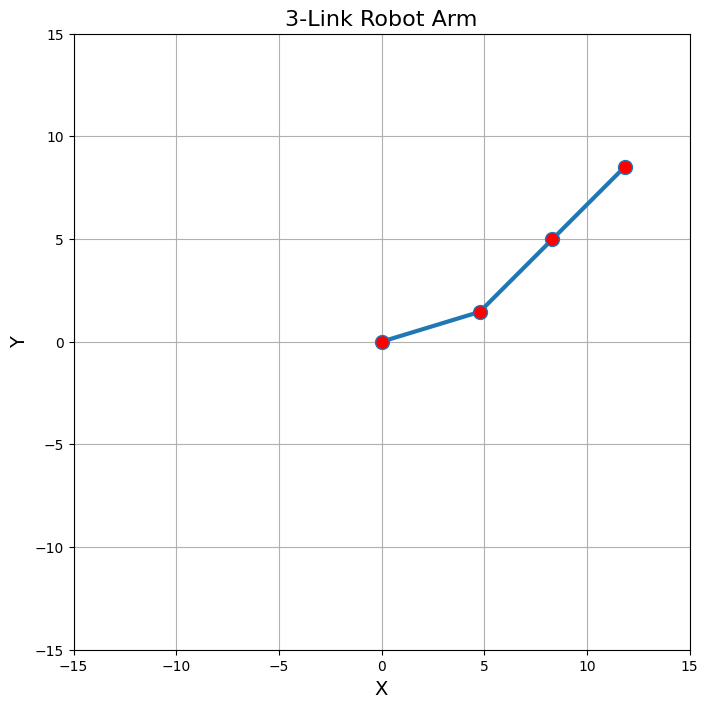

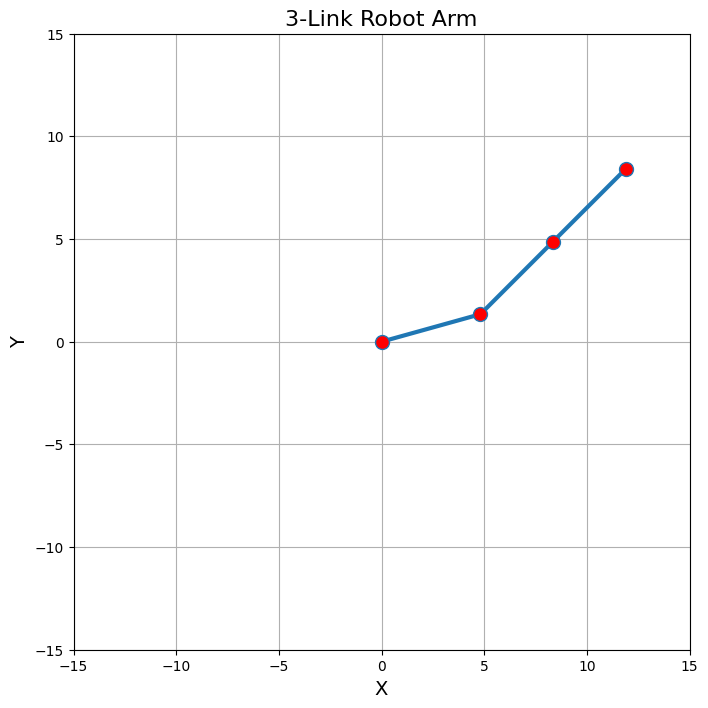

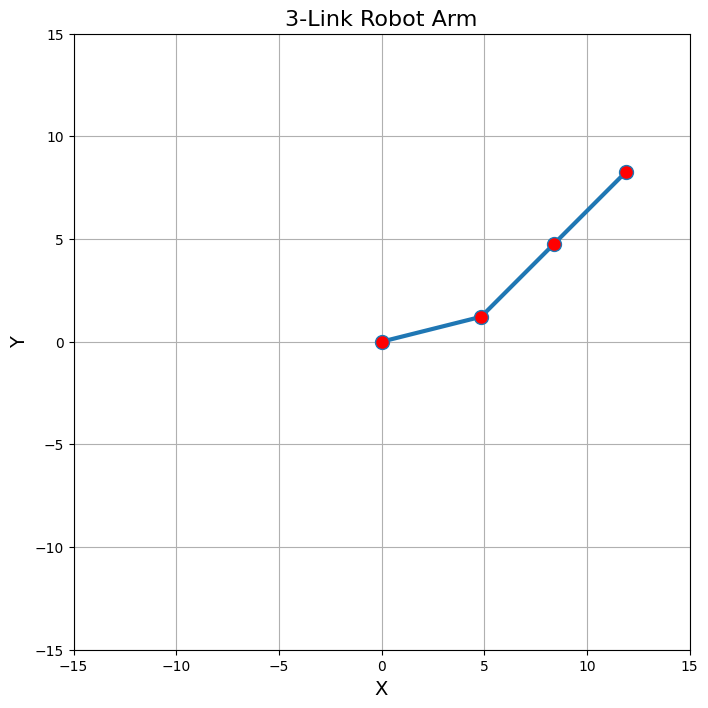

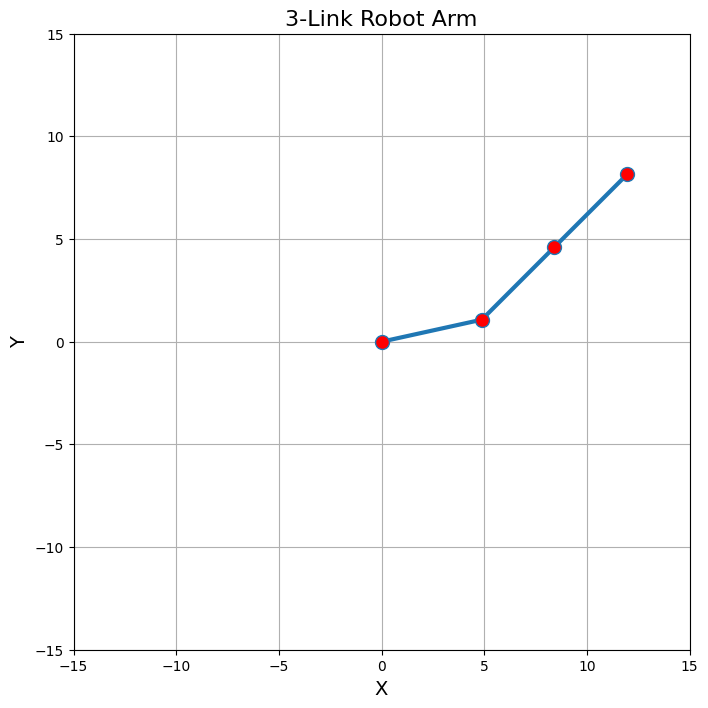

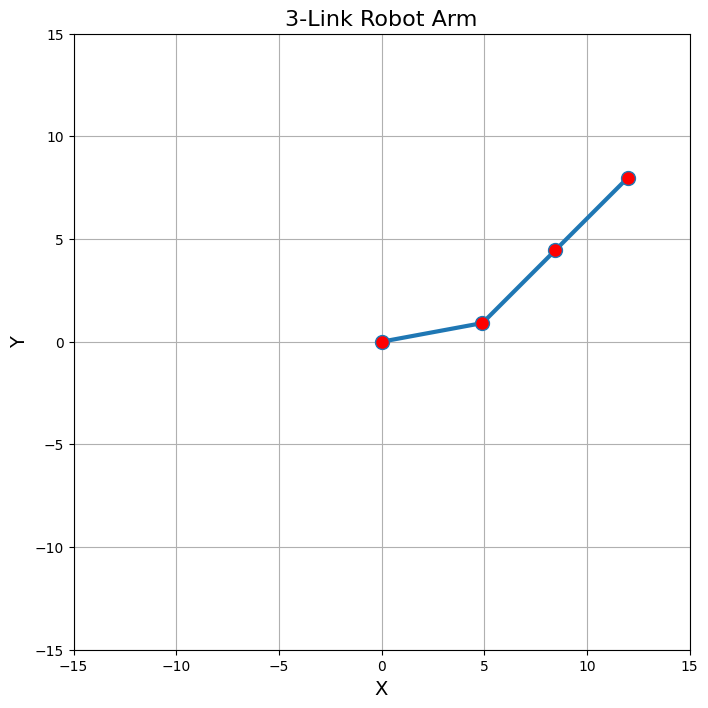

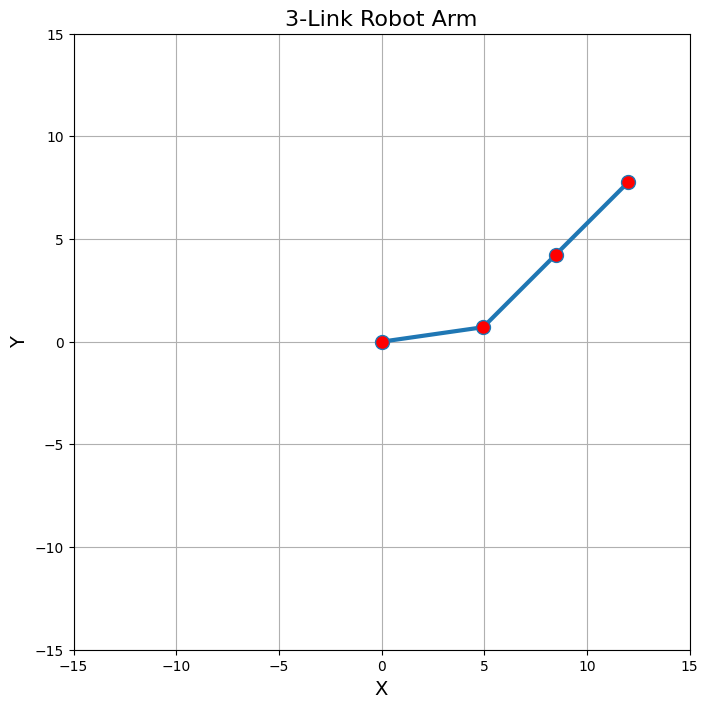

In [ ]:
# Task 4: Path Planning
start_position = (0, 0)
target_position = (7, 7)
path_planning(start_position, target_position, L3, L2, L1)

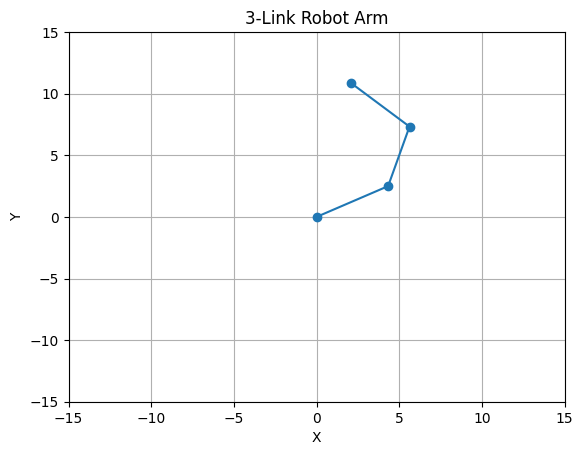

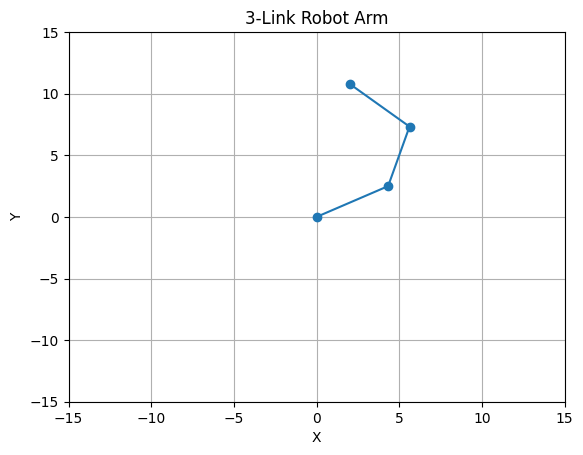

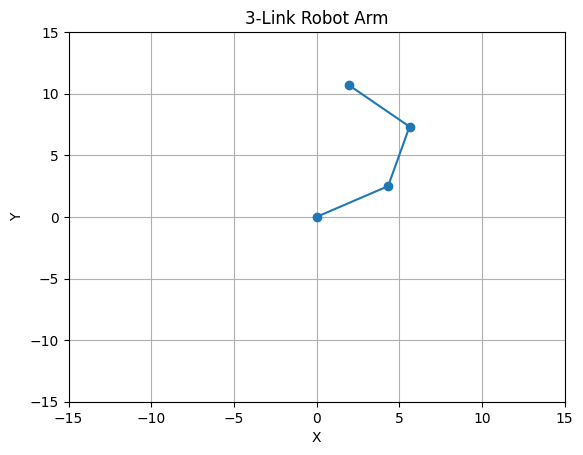

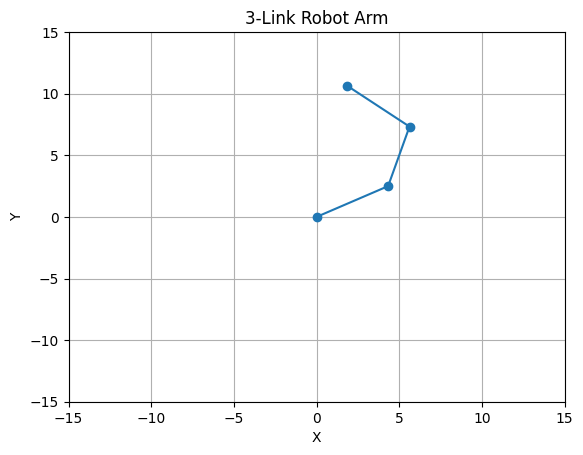

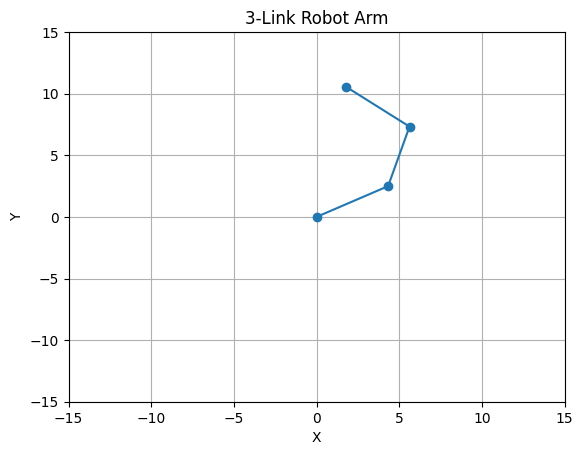

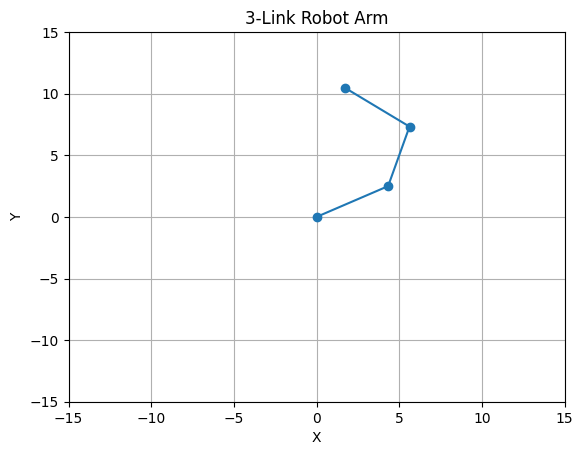

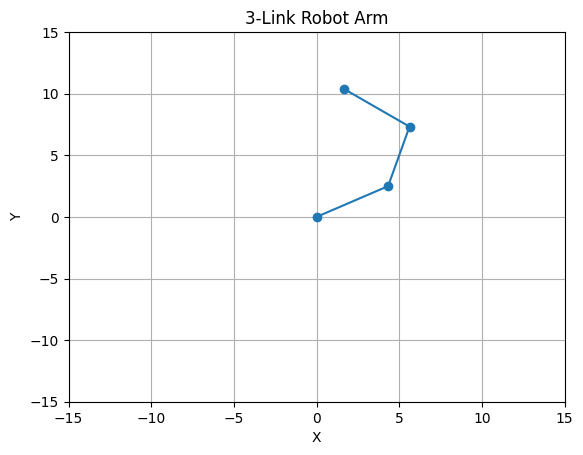

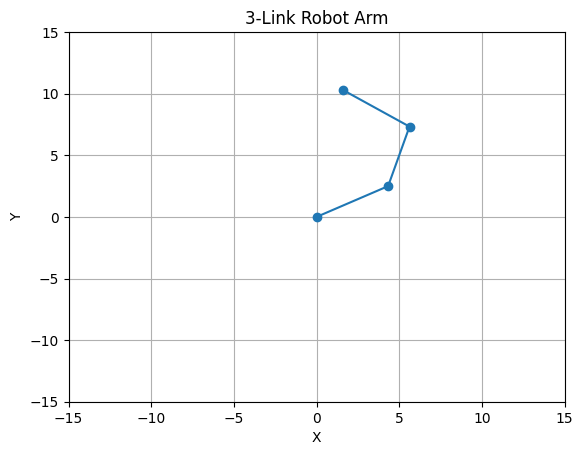

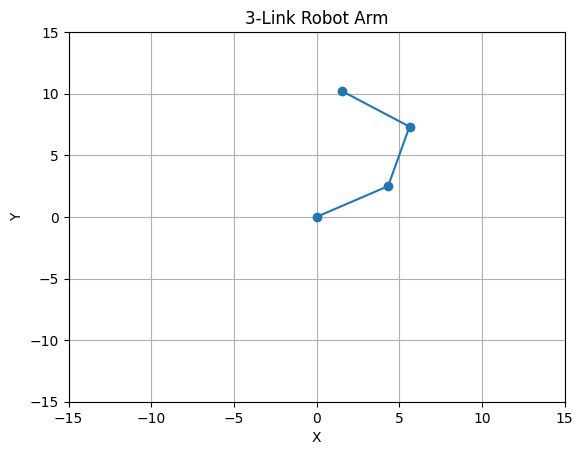

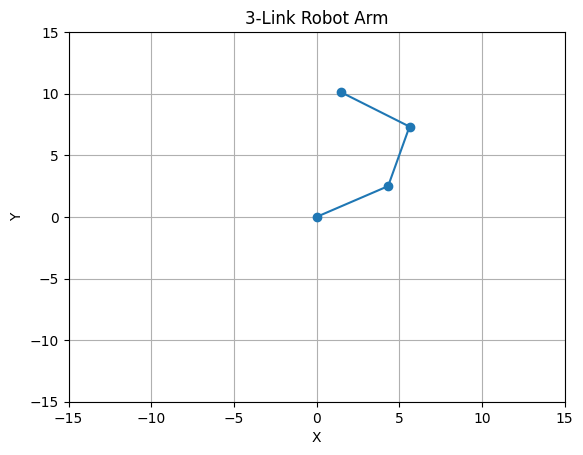

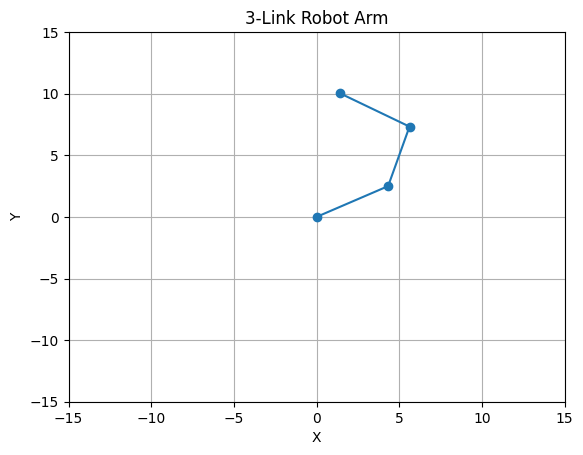

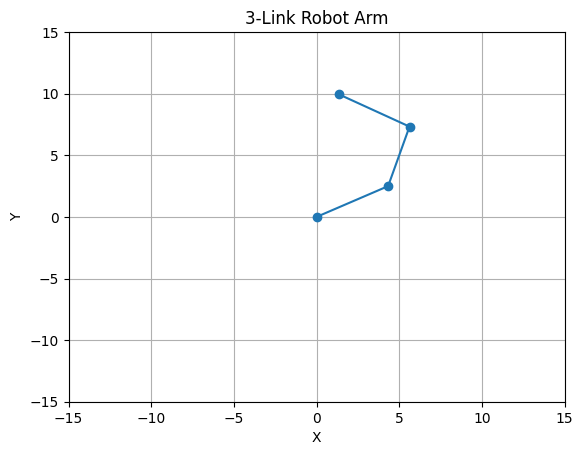

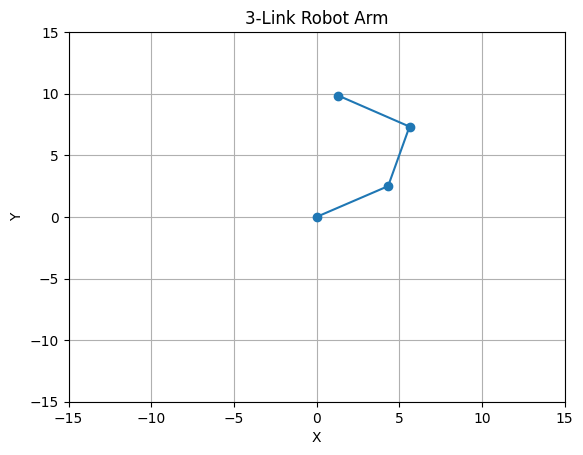

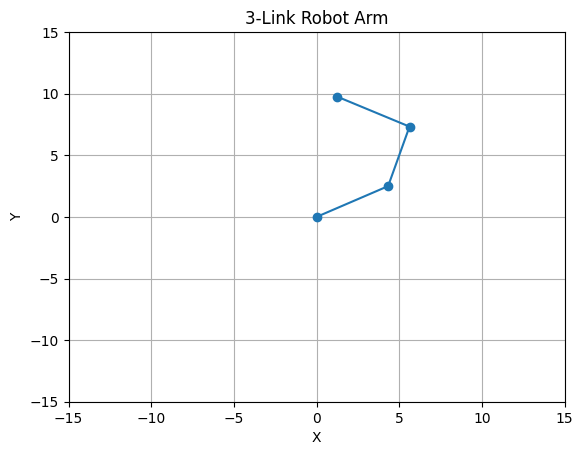

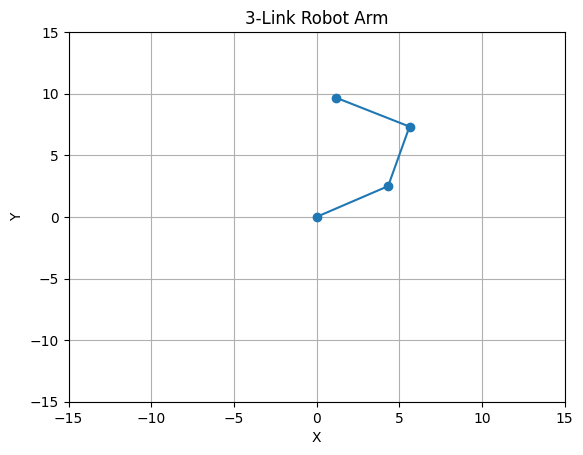

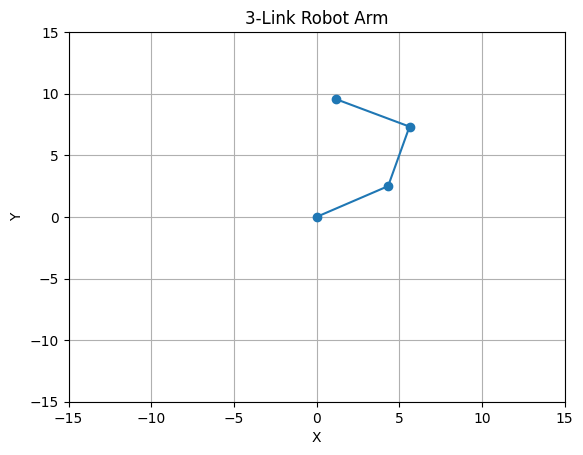

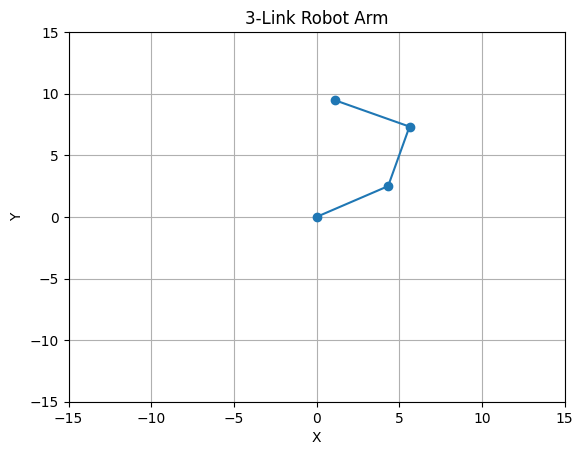

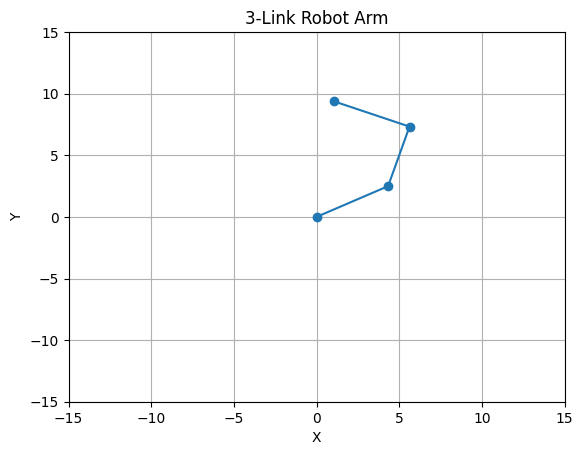

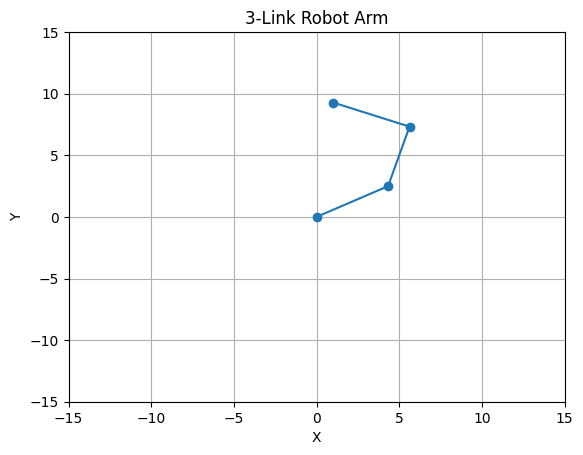

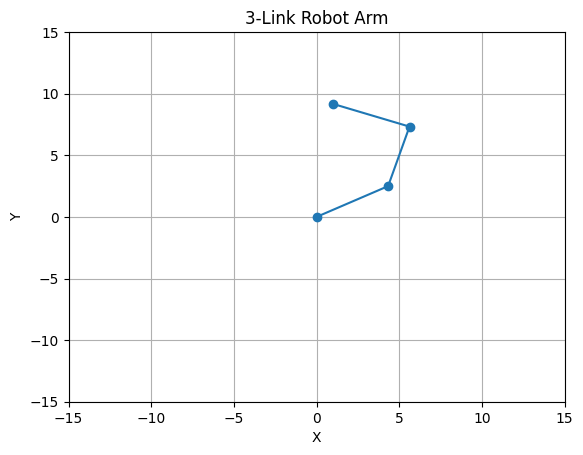

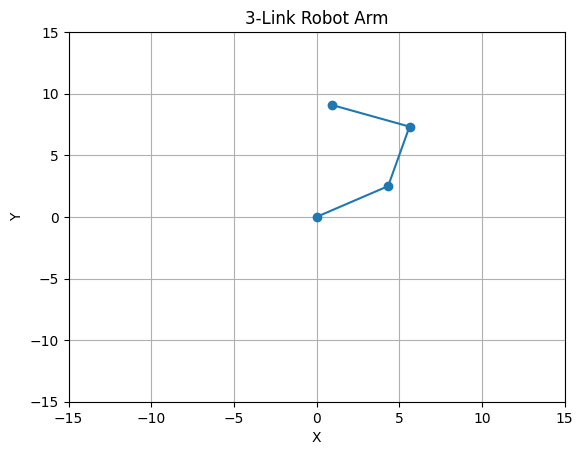

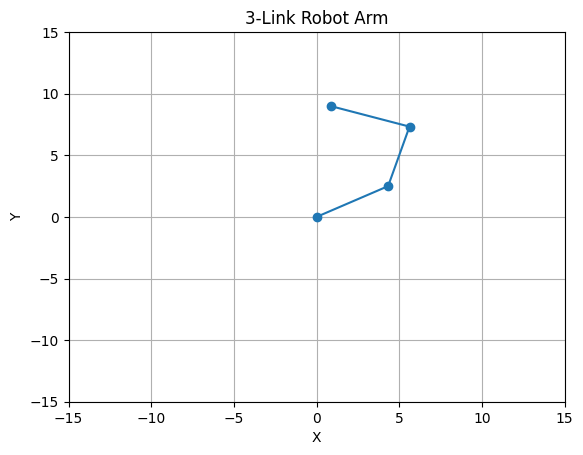

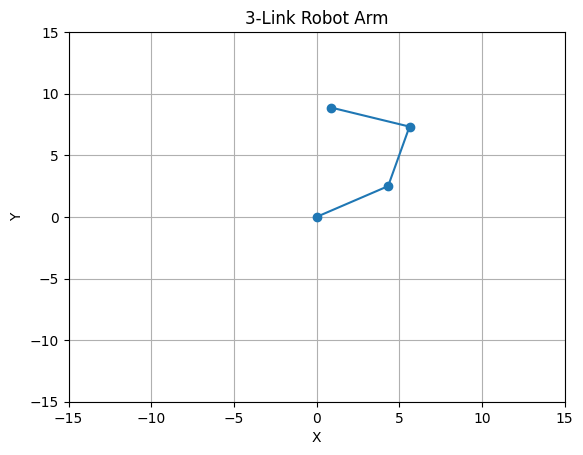

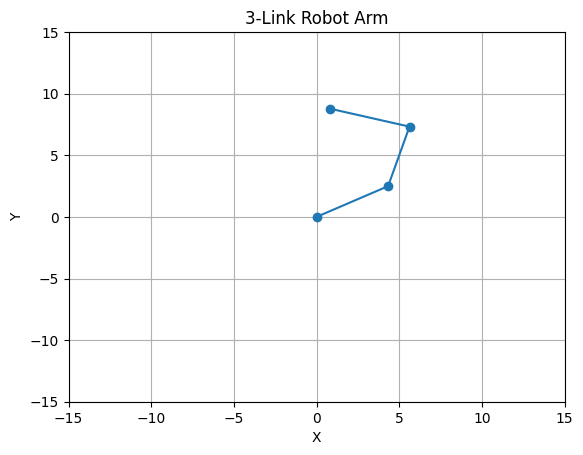

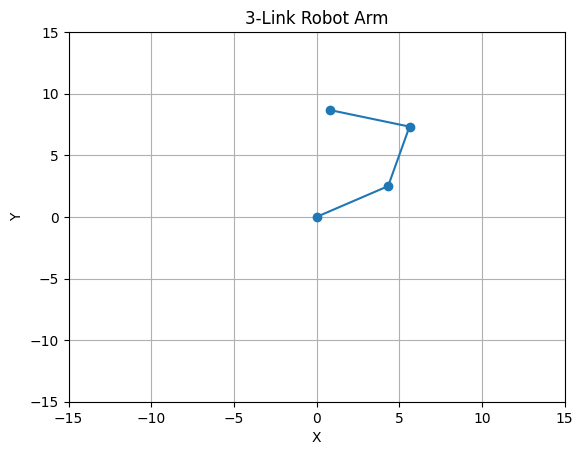

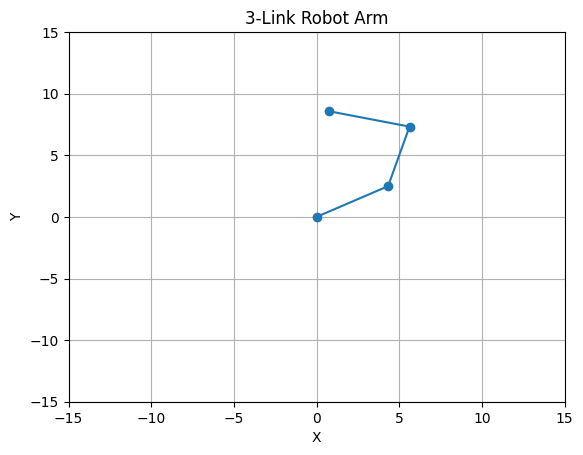

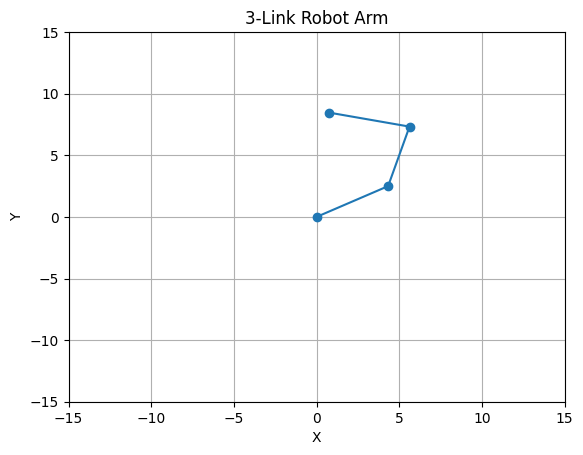

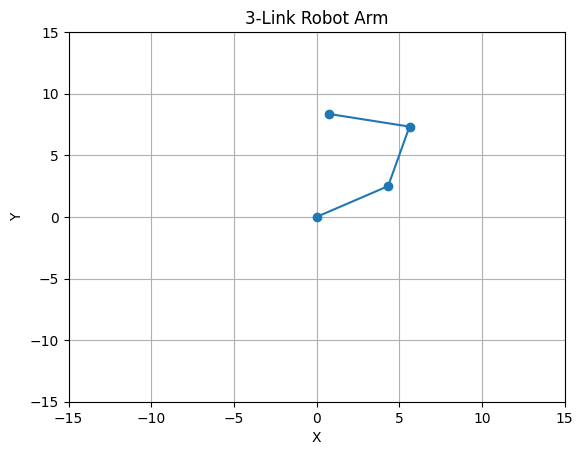

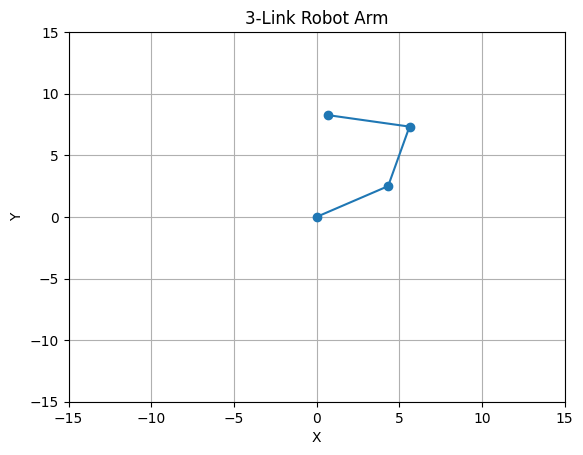

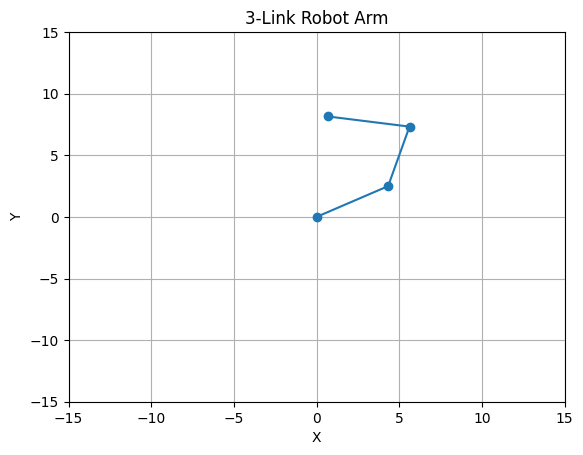

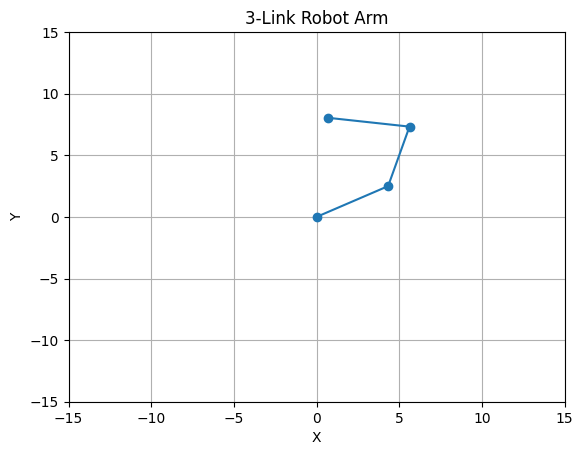

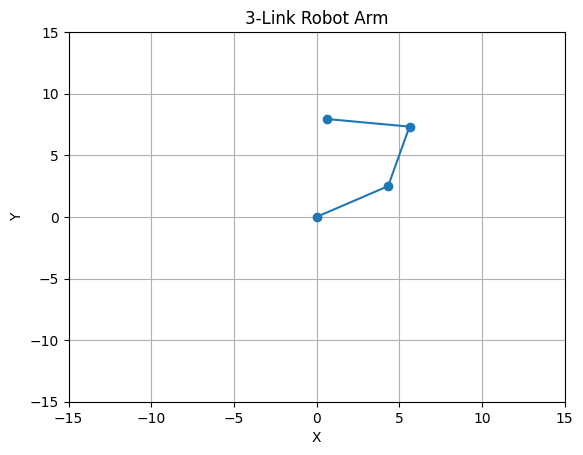

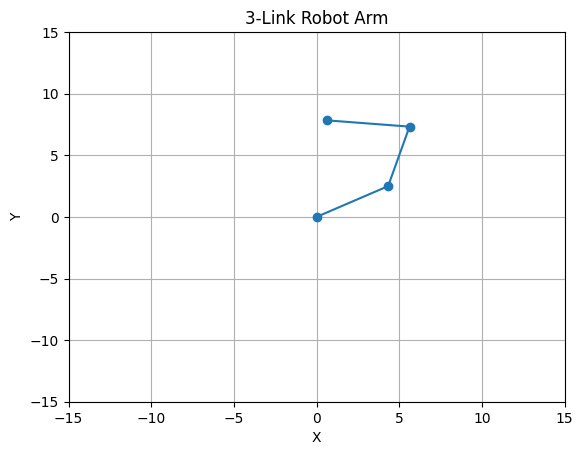

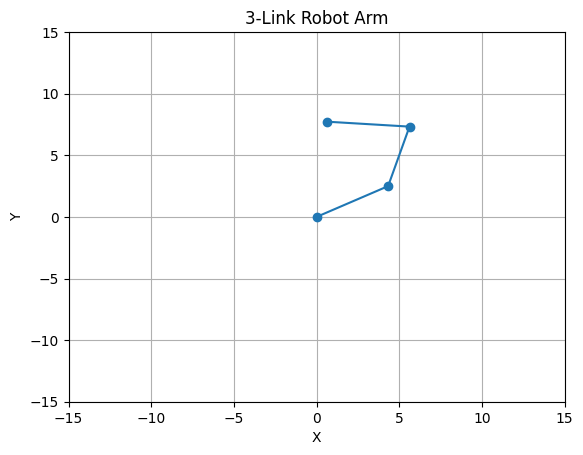

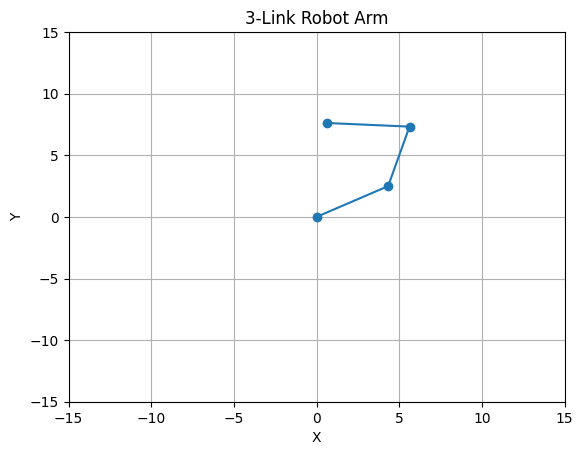

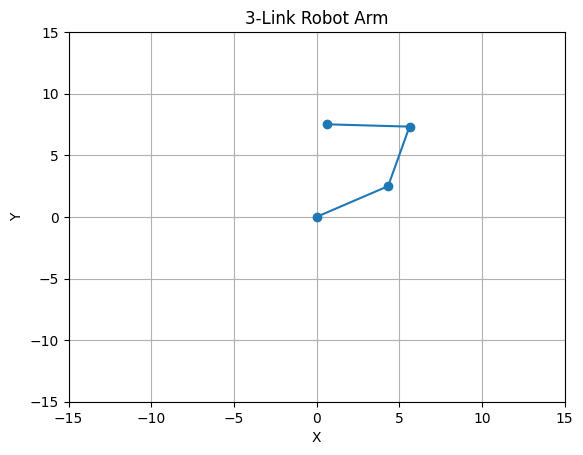

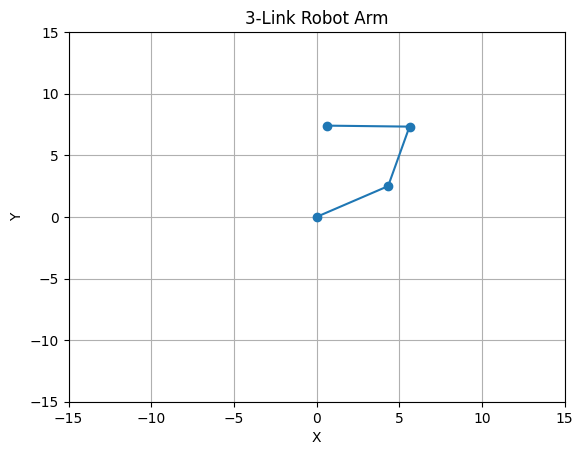

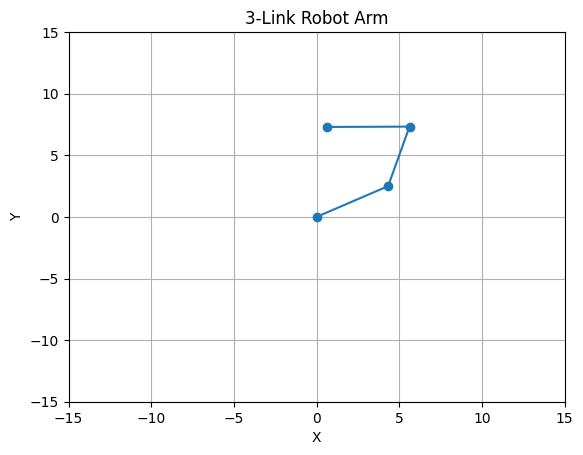

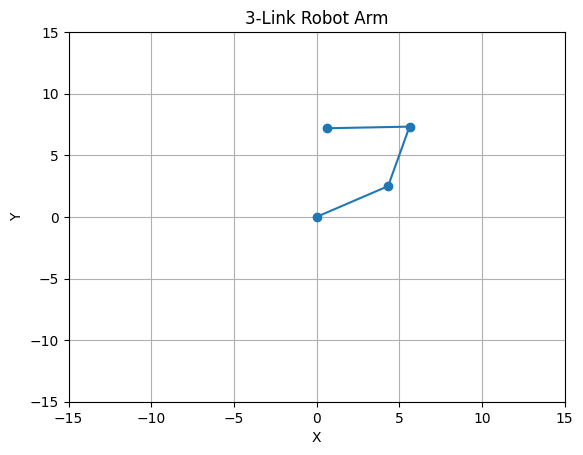

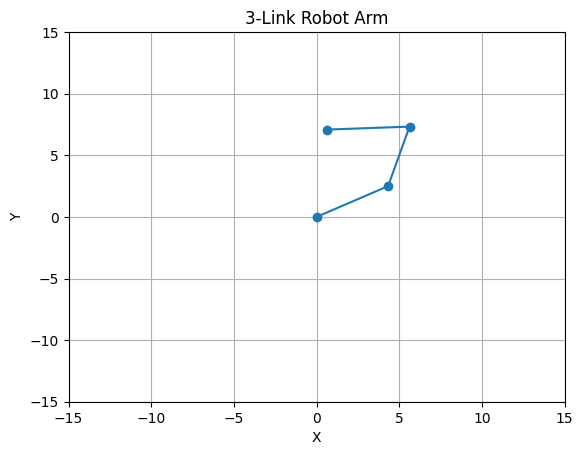

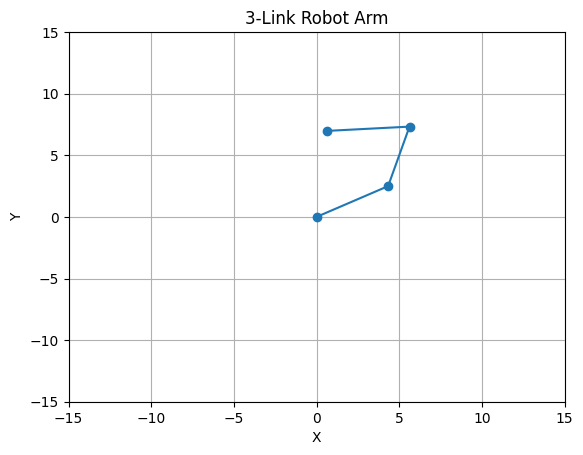

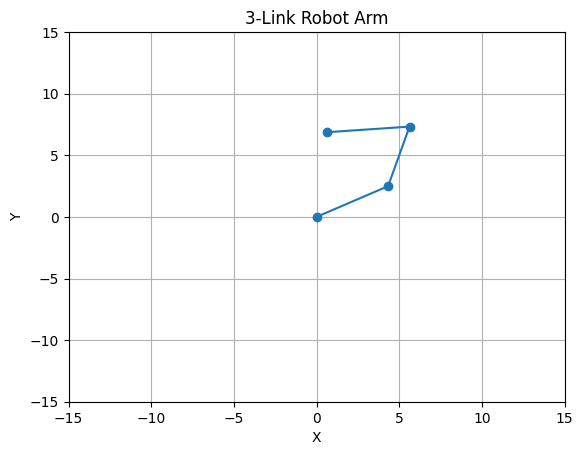

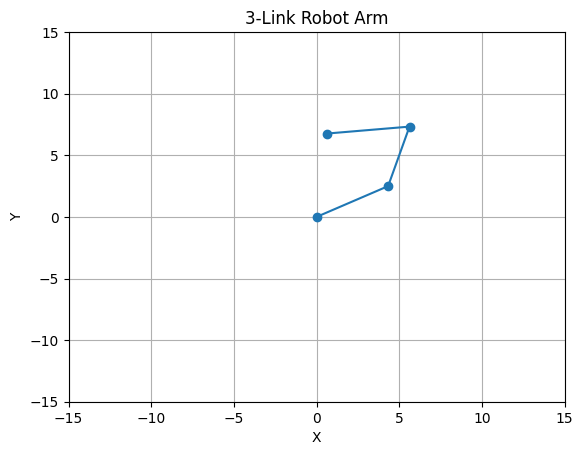

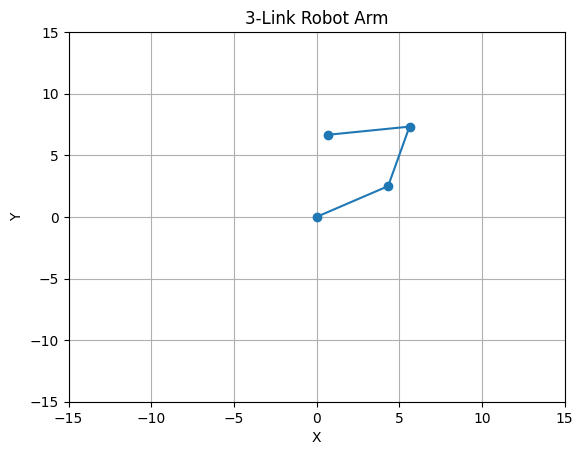

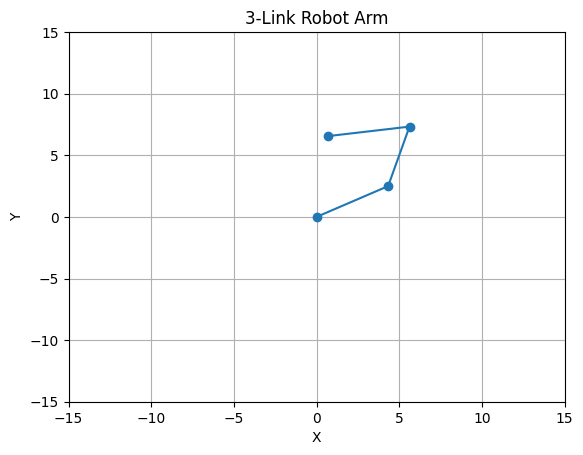

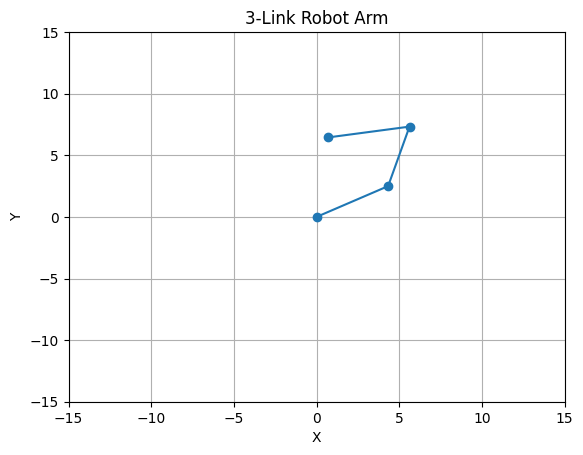

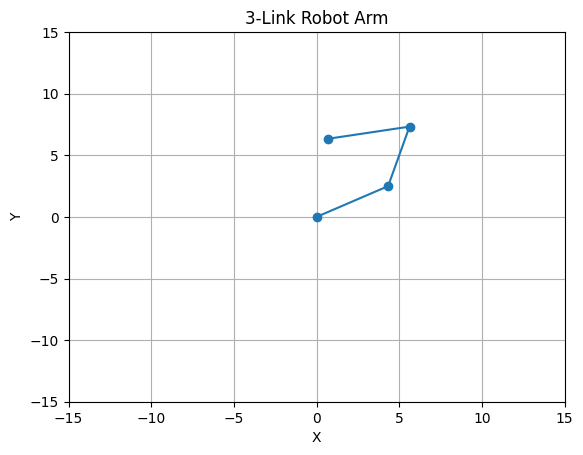

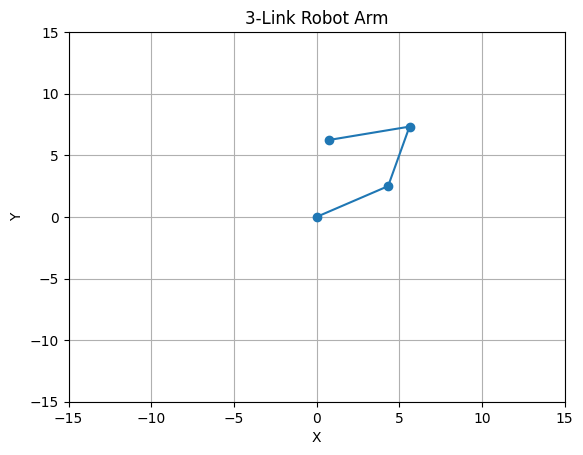

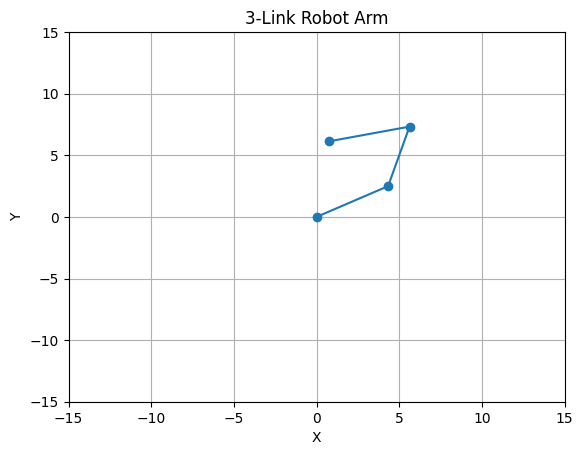

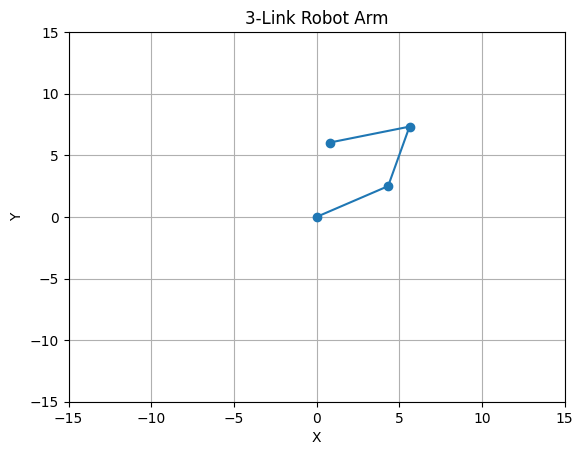

In [ ]:
# Path planning to move the third link
def path_planning(theta1_fixed, theta2_fixed, L1, L2, L3, steps=50):
    theta3_start = 60  # Start from 60 degrees
    theta3_end = 120   # Move to 120 degrees

    theta3_values = np.linspace(theta3_start, theta3_end, steps)

    for theta3 in theta3_values:
        plot_robot(theta1_fixed, theta2_fixed, theta3, L1, L2, L3)

# Start the path planning with fixed theta1, theta2, and varying theta3
path_planning(theta1_fixed, theta2_fixed, L1, L2, L3)
